In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

#### Reading data and understanding the data 

In [2]:
# 1.Reading data from csv file

tele = pd.read_csv("telecom_churn_data.csv")

In [3]:
#Reading and understanding data
tele.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
#check the head of the database
tele.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#check for null 
round((tele.isnull().sum()/len(tele))*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

We can see from above that there are some columns with more than 70% of null values but most of them have less than 10% or no Null values

In [6]:
#check for no. of rows and columns in the dataframe
tele.shape

(99999, 226)

We have 99999 rows and 226 columns

####  Data Cleaning

In [7]:
#imputing and dealing with missing values
drop_col = list(round(tele.isnull().sum()/len(tele.index)*100,2)[round(100*tele.isnull().sum()/len(tele.index),2)>60].keys())

In [8]:
drop_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [9]:
#dropping columns with high percentage of missing values
tele = tele.drop(drop_col,axis =1)

In [10]:
#Checking rows and columns in the dataframe after dropping
tele.shape

(99999, 186)

### Checking and dropping unnecessary columnns 

In [11]:
#check for columns with datatype as object
tele.columns[tele.dtypes.values=='object']

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

Since from the dataframe we can see that date of month column are not needed thus dropping them will be better

In [12]:
#dropping unnecessary columns
tele = tele.drop(tele.columns[tele.dtypes.values=='object'],axis = 1)

### Imputing missing values with help of Fancy Imputer 

In [13]:
#importing the fancy impute library
from fancyimpute import IterativeImputer

In [14]:
tele_col = tele.columns

In [15]:
#instance of interative imputer
ii = IterativeImputer()
tele_c = pd.DataFrame(ii.fit_transform(tele))
tele_c.columns = tele_col

In [16]:
tele_c.to_csv('my_file.csv',index = False)

In [17]:
tele_c = pd.read_csv('my_file.csv')

In [18]:
#check for percentage of missing values
round(100*tele_c.isnull().sum()/len(tele_c.index),2)

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

No null values remaining after imputation

#### Filter high value customer

In [19]:
#calculate total_rech_amt with help of good phase
tele_c['total_rech_amt'] = (tele_c['total_rech_amt_6'] + tele_c['total_rech_amt_7'])/2
#calculating high value customer with total_rech_amt>70 
tele_c = tele_c[tele_c['total_rech_amt'] > tele_c['total_rech_amt'].quantile(0.70)]

In [20]:
#drop unnecessary coliumns
tele_c.drop('total_rech_amt',axis=1,inplace=True)

In [21]:
#checking rows and columns in the dataframe
tele_c.shape

(29979, 178)

1. We have selected top 30 percentile customers based on their recharge amount for the month of 6 & 7
2. We are left with 29979 no of rows after filtering high value customers

#### Derive Churn

In [22]:
#deriving the churn variable with help of 9 th months data
tele_c['churn'] = np.where((tele_c['total_og_mou_9'] + tele_c['total_ic_mou_9'] + tele_c['vol_2g_mb_9'] + tele_c['vol_3g_mb_9'])== 0, 1, 0)

In [23]:
#contains columns with 9 th month data
delete = []

In [24]:
#deleting 9 th month data
for i in tele_col:
    if '9' in i:
        delete.append(i)

In [25]:
#dropping 9 th months data from dataframe
tele_c = tele_c.drop(delete,axis = 1)

In [26]:
#Calculating the churn rate
100*tele_c['churn'].sum()/len(tele_c)

8.636045231662164

We can see roughly 8.6% customers have churned

#### Creating derived columns

In [27]:
#total data usage of 6 7 8 months 2g and 3g both
tele_c['total_data_usage'] =tele_c[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].mean(axis=1)

In [28]:
#dropping unnecessary columns
tele_c = tele_c.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)

#### Exploratory Data Analysis


##### Continous Variables

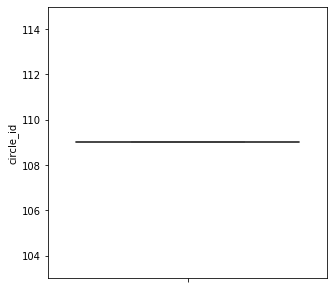

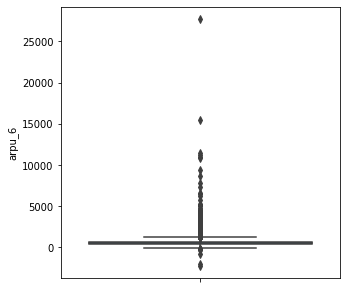

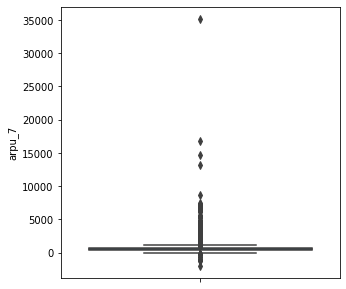

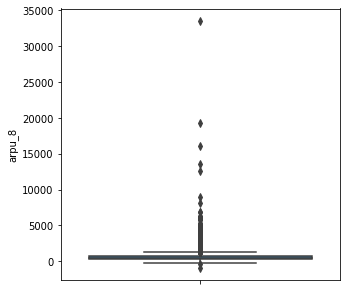

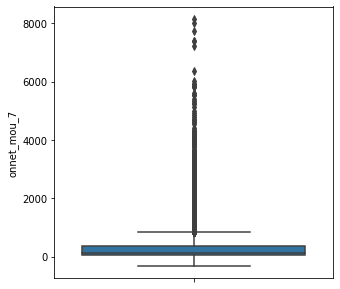

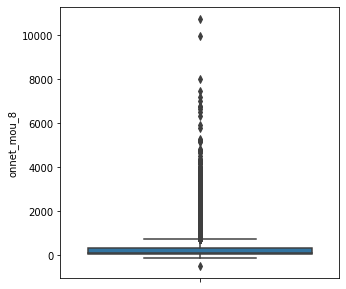

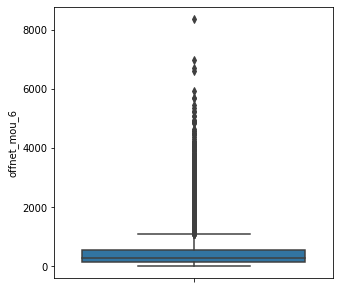

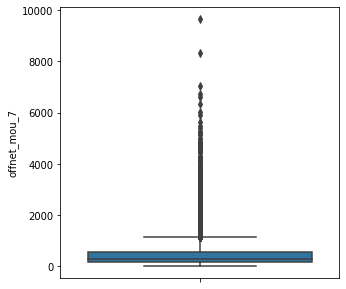

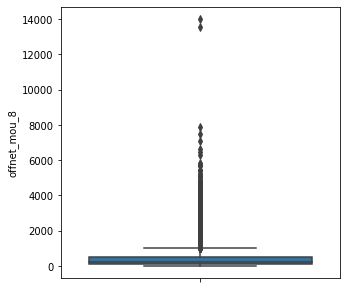

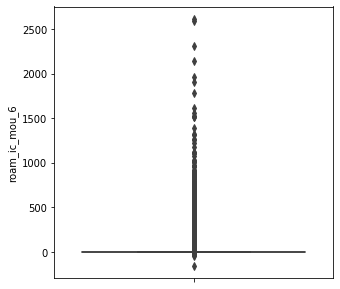

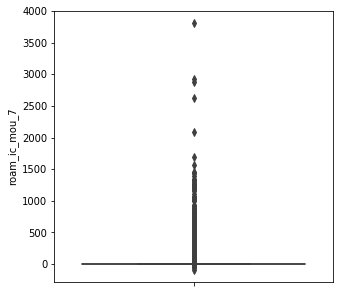

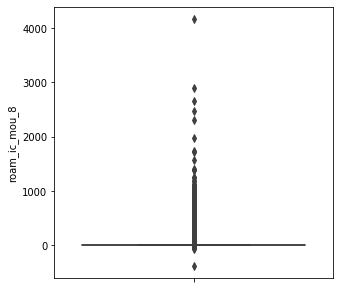

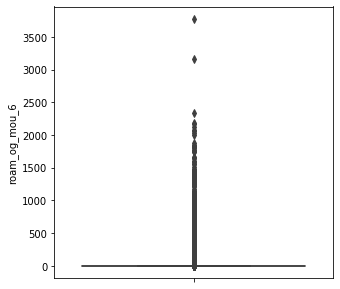

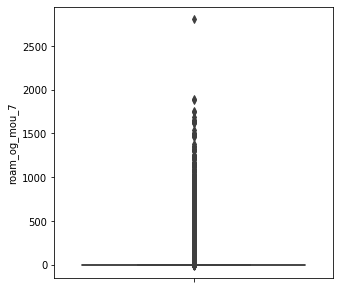

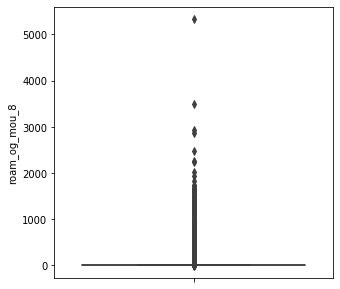

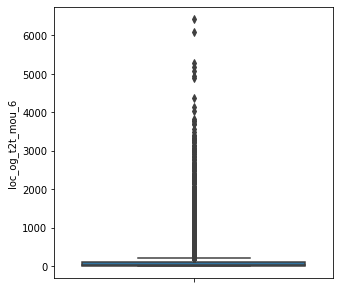

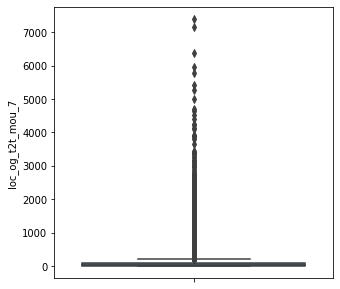

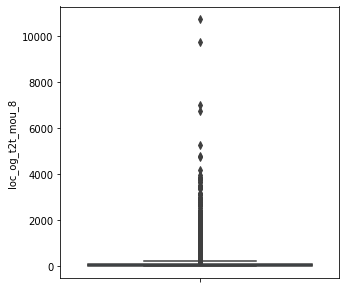

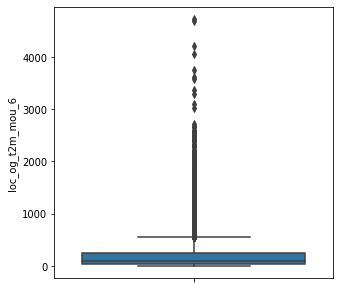

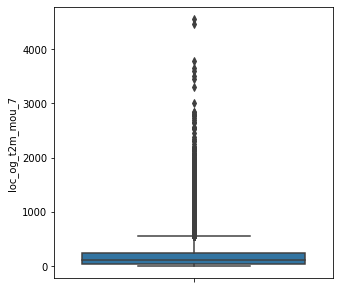

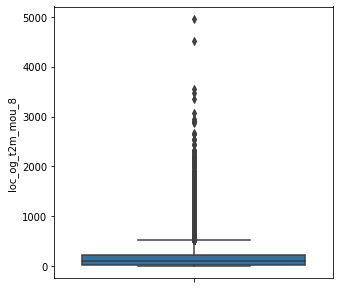

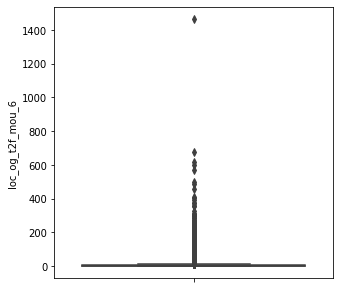

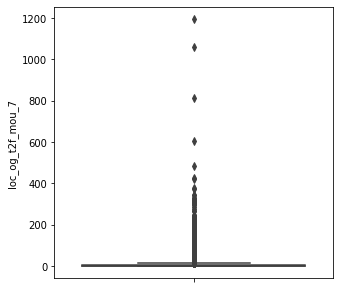

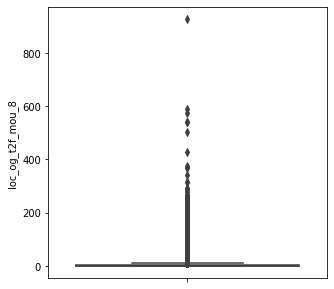

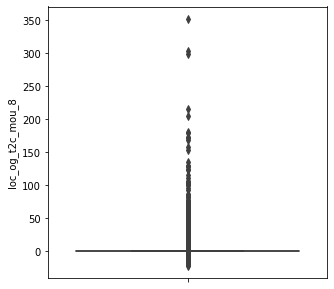

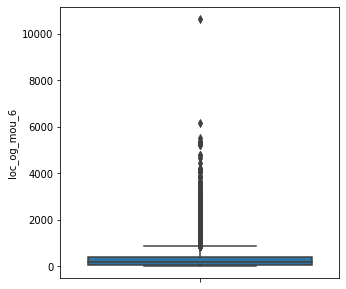

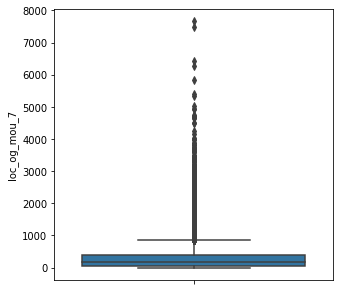

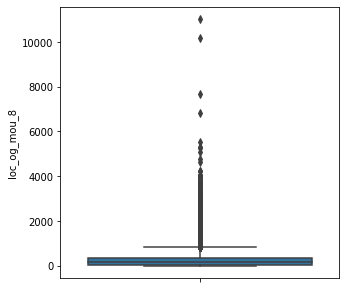

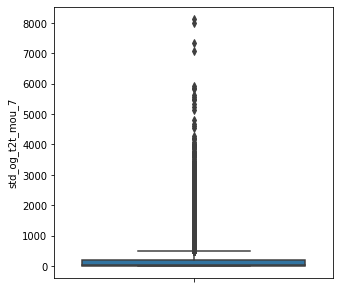

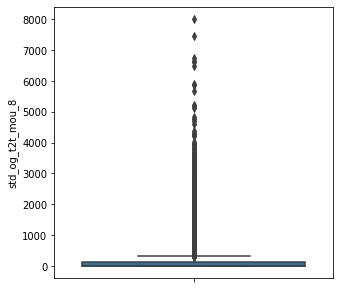

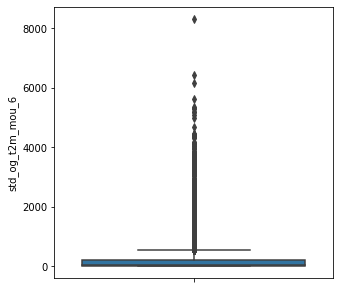

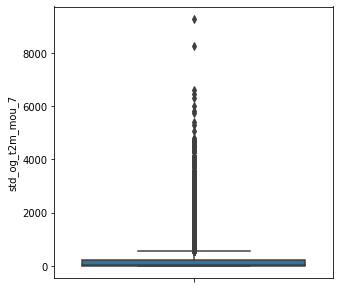

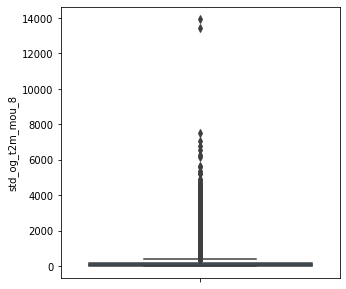

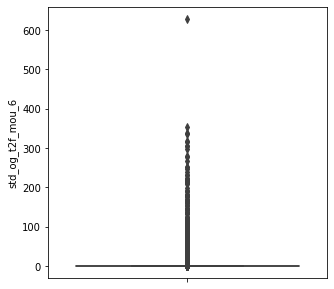

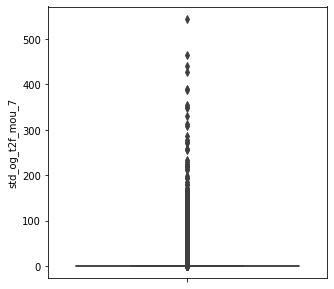

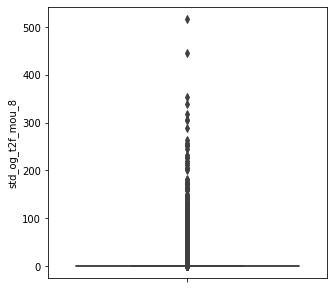

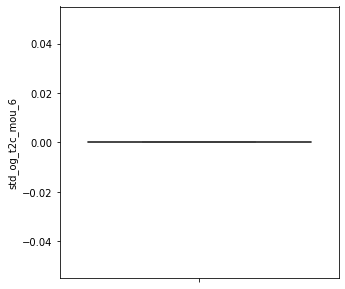

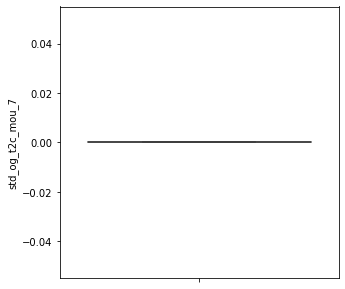

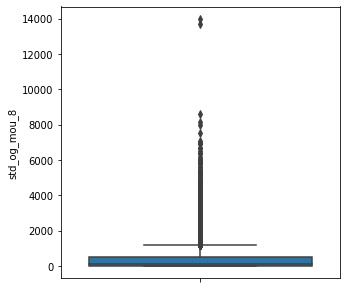

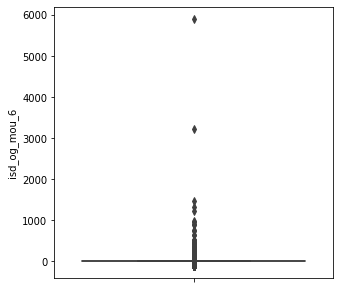

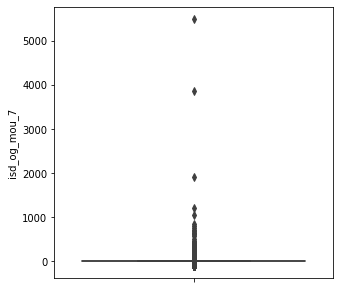

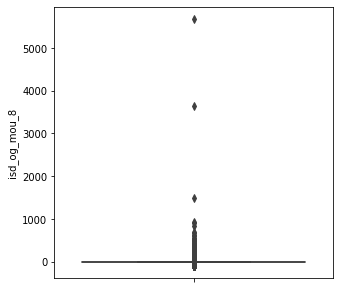

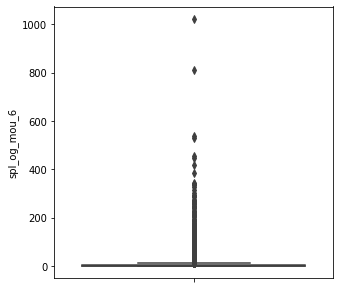

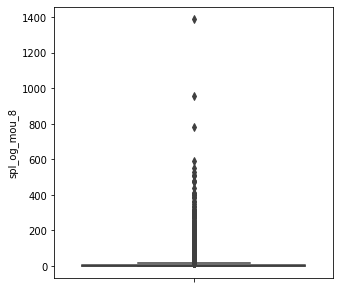

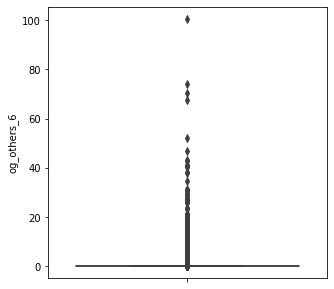

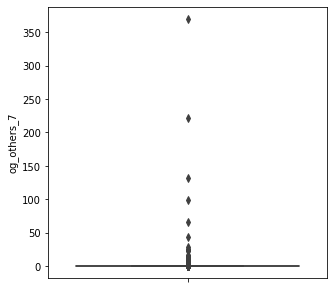

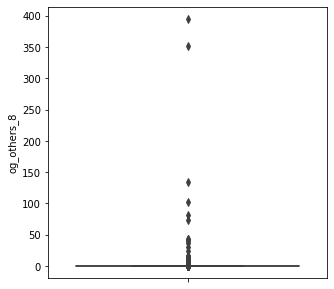

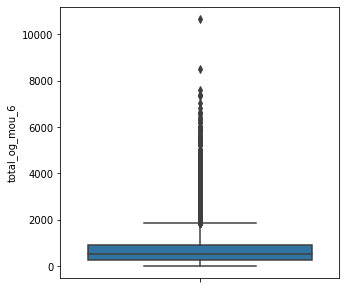

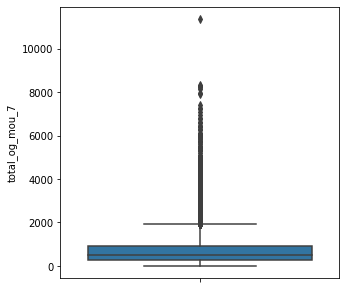

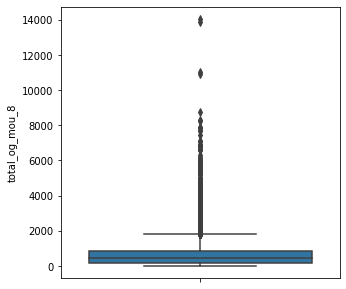

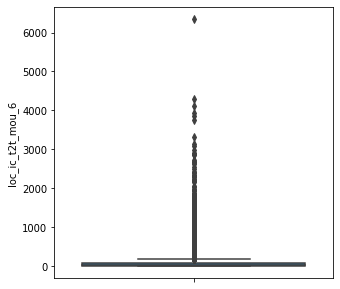

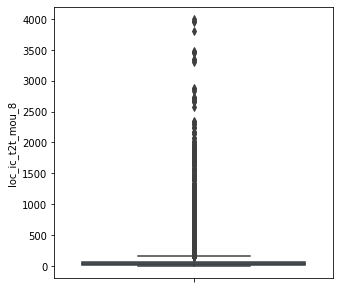

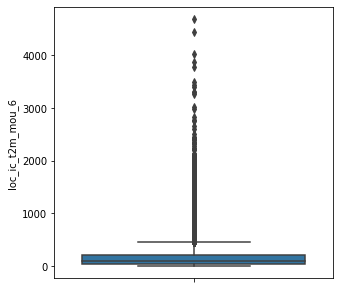

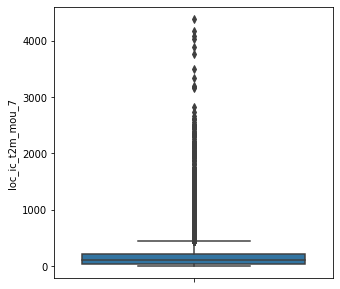

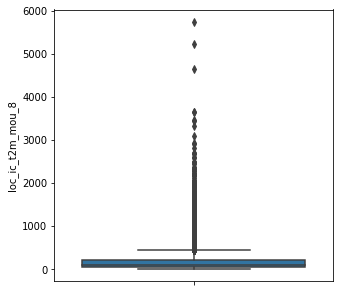

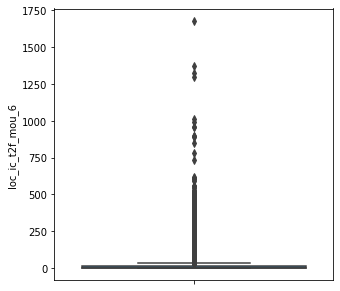

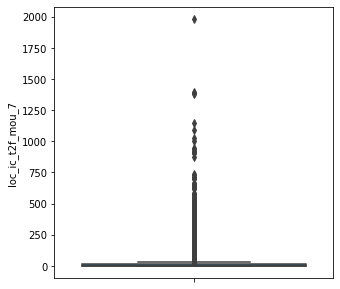

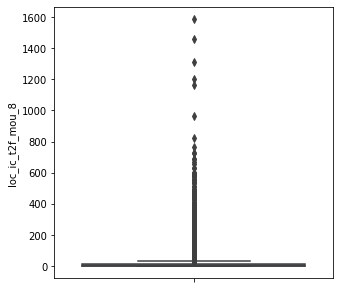

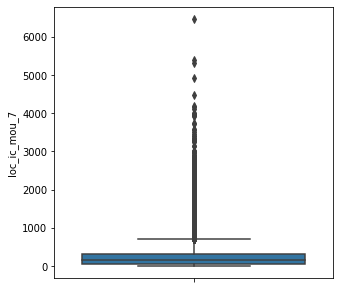

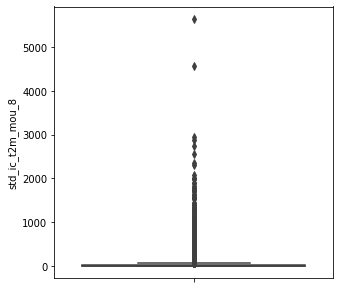

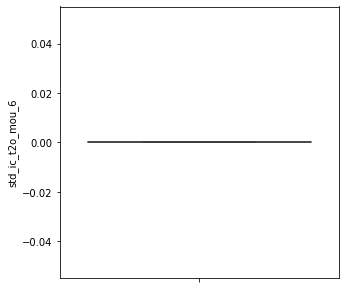

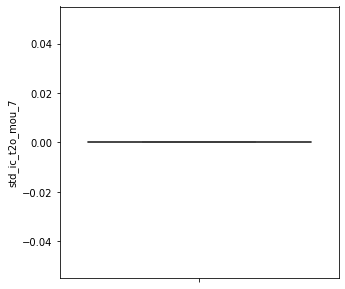

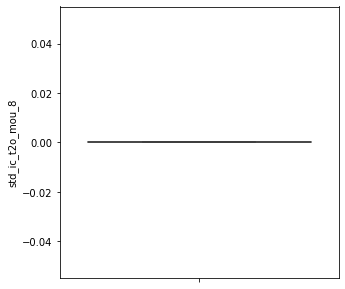

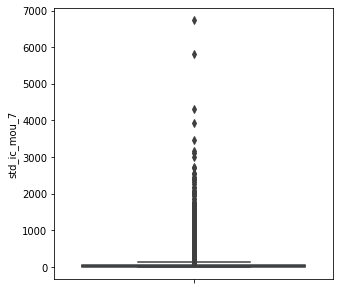

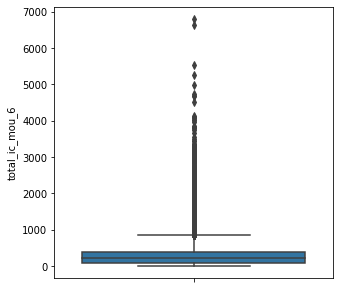

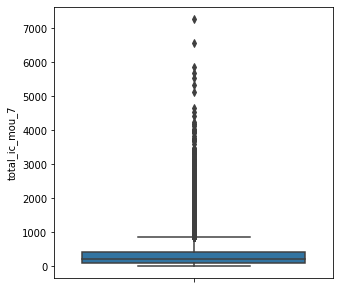

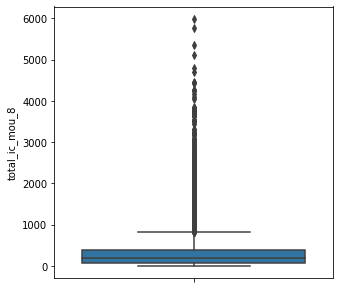

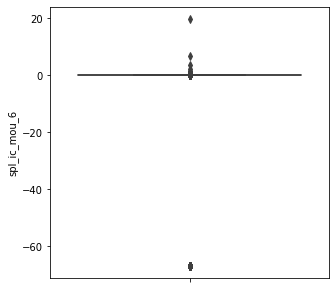

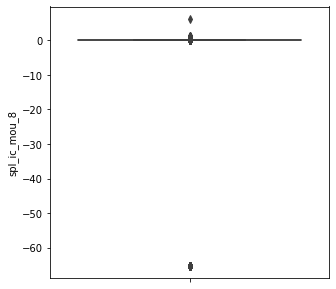

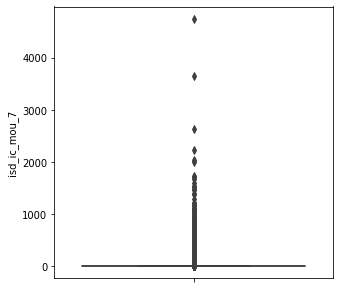

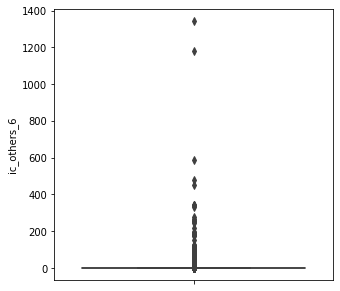

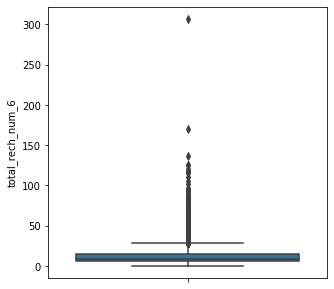

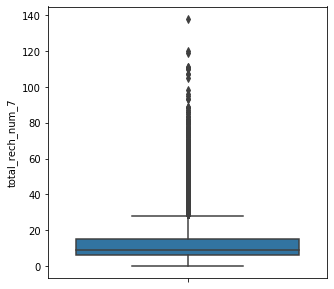

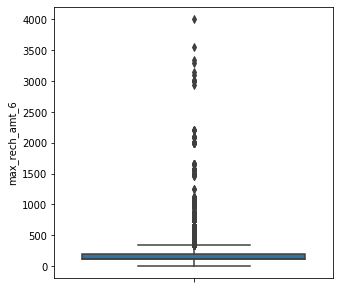

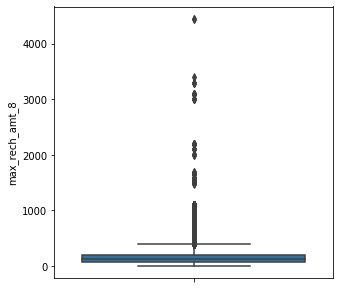

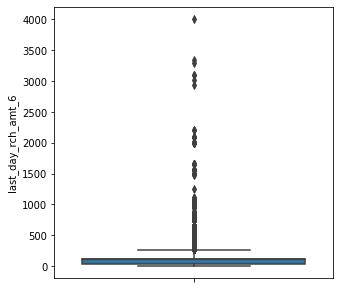

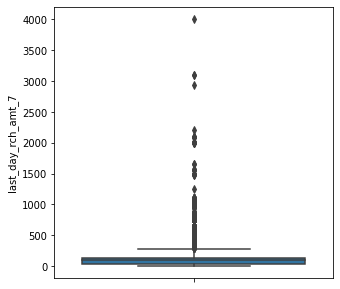

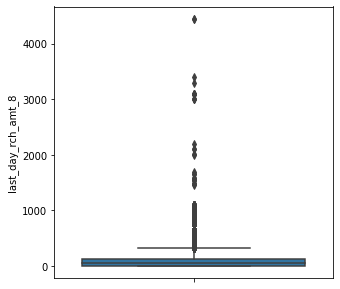

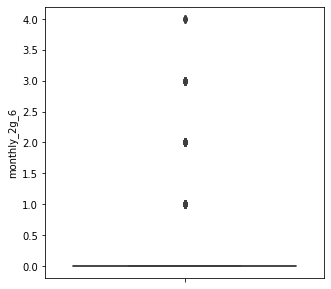

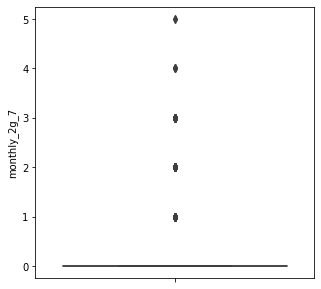

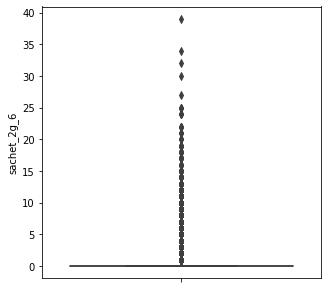

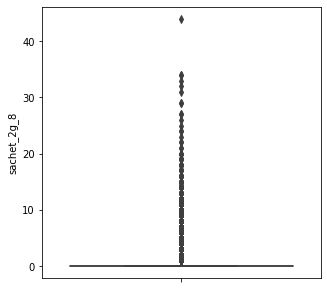

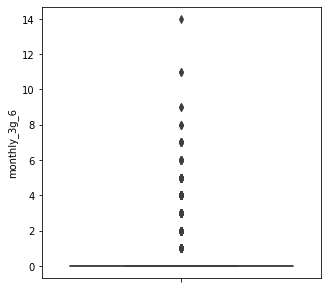

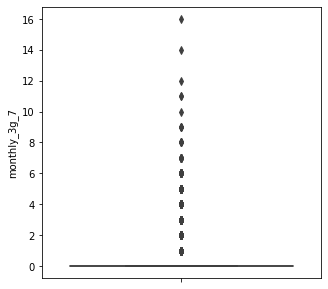

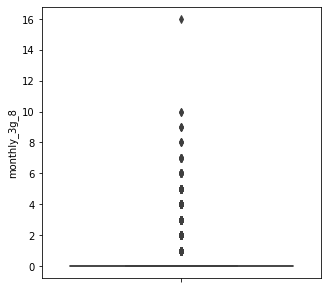

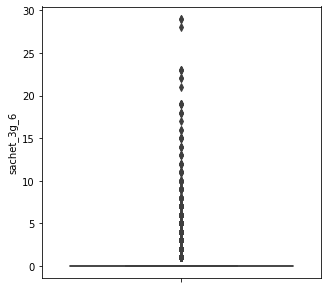

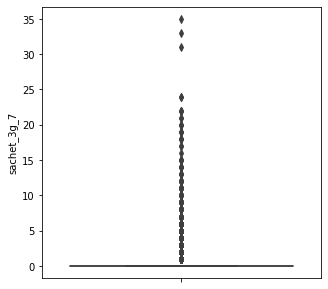

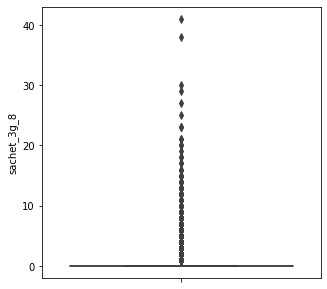

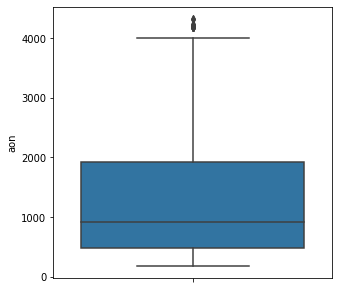

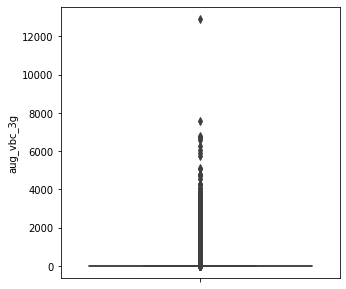

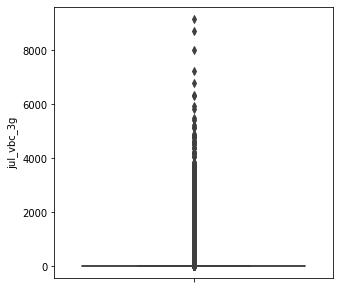

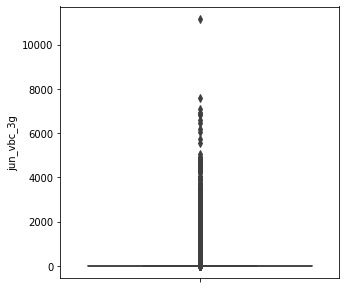

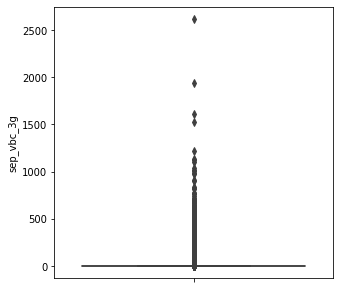

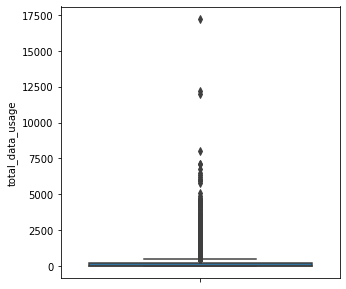

In [29]:
#plotting the boxplot
cont_cols = [col for col in tele_c.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize = (5, 5))
    sns.boxplot(y = col, data = tele_c)

Outliers are present in almost all the columns

In [30]:
#Check for variance of columns
tele_c.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.997900e+04    29979.0         29979.0         29979.0   
mean    7.001223e+09      109.0             0.0             0.0   
std     6.846594e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001232e+09      109.0             0.0             0.0   
75%     7.001814e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29979.0  29979.000000  29979.000000  29979.000000  29979.000000   
mean              0.0    587.587624    589.424681    535.067748    295.766307   
std               0.0    442.848876    463.049067    492.447887    461.266344   
min               0.0  -2258.709000  -2014.045000   -945.808000    -66.791422   
25%               0.0    364.352500    365.235000    289.782000     41.180000   
50%               0.0    495.951000    493.781000    452.232000    125.890000   
75%               0.0    704.184500    700.986000    671.349500    353.500000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     304.428602    266.408901    420.094277    425.870159    380.599271   
std      482.076634    467.627360    469.410183    485.483231    474.332191   
min     -318.469975   -506.809342      0.000000      0.000000      0.000000   
25%       41.060000     27.070000    142.860000    141.280000    111.780000   
50%      125.560000     99.590000    282.260000    282.040000    241.040000   
75%      360.360000    298.215000    523.625000    532.905000    483.000000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       17.793504      13.746132      14.519182      29.499511   
std        79.241726      76.386332      74.972230     118.601571   
min      -156.352254     -92.028478    -380.787833       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       22.112839      21.736397         95.172112         96.071660   
std        97.963875     106.253286        236.823659        248.156392   
min       -16.355024     -11.767931          0.000000          0.000000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         34.030000         33.190000   
75%         0.000000       0.000000         91.550000         91.535000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29979.000000      29979.000000      29979.000000      29979.000000   
mean          88.125515        182.320308        182.247181        170.489250   
std          234.542278        249.699366        240.293362        233.385740   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.760000         32.210000         35.560000         28.480000   
50%           30.073813        101.280000        104.360000         91.806959   
75%           84.700000        240.230000        239.485000        223.615000   
max        1075

#### From we can note that some columns do not show variance in data thus dropping them

In [31]:
my_lis = list(tele_c.loc[:,tele_c.apply(pd.Series.nunique) == 1].columns)

In [32]:
tele_c = tele_c.drop(my_lis,axis = 1)

In [33]:
tele_c.shape

(29979, 122)

##### Bivariate WRT 'Churn'

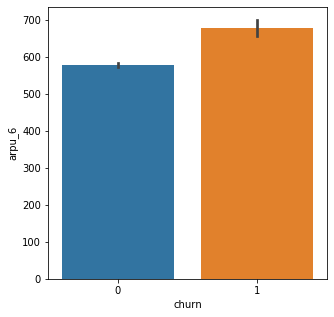

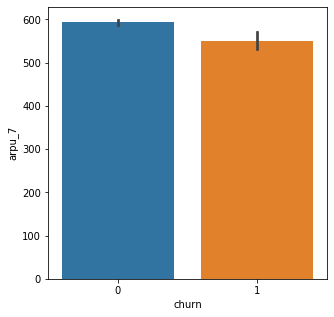

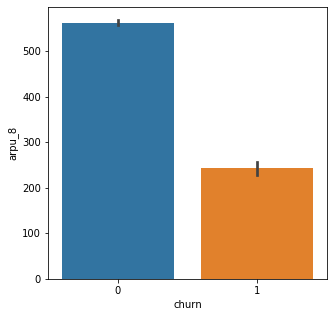

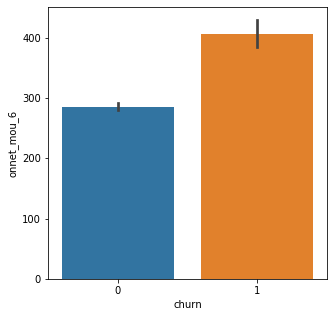

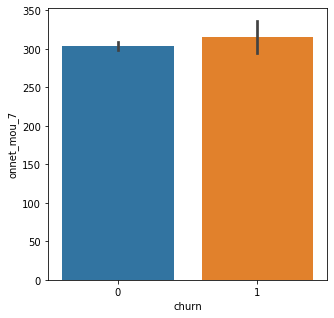

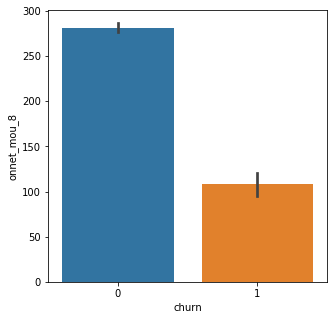

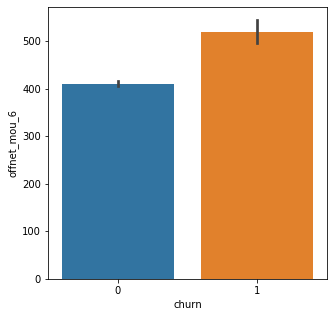

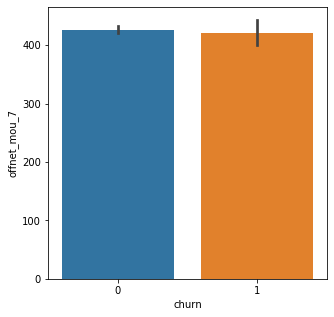

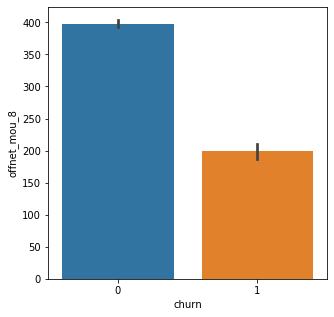

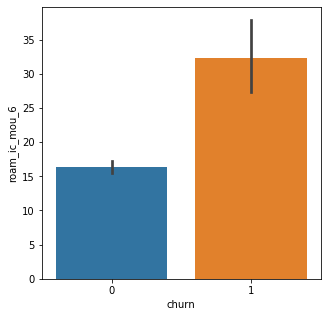

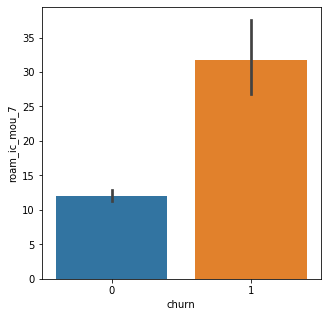

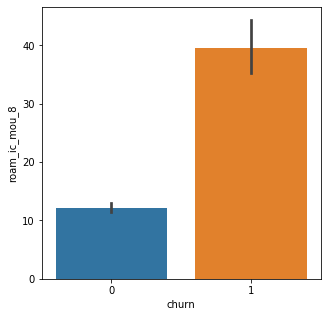

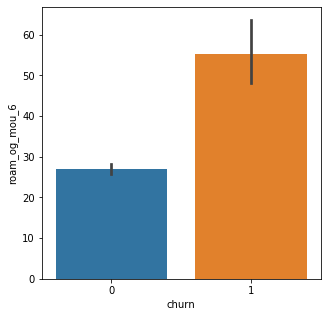

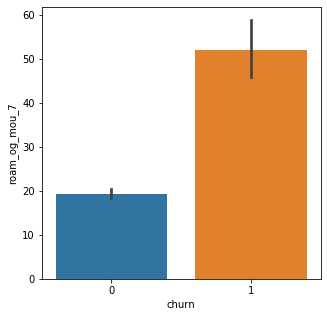

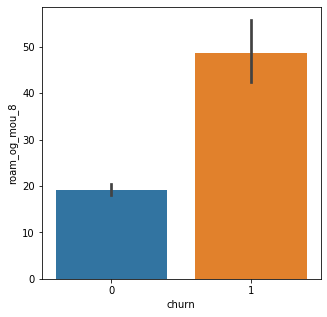

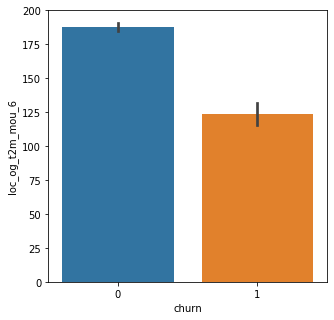

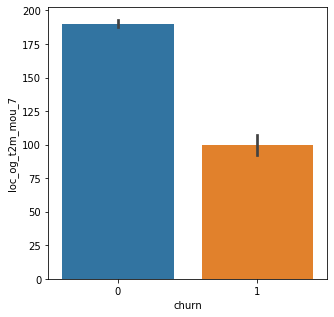

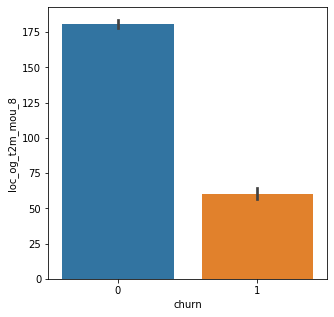

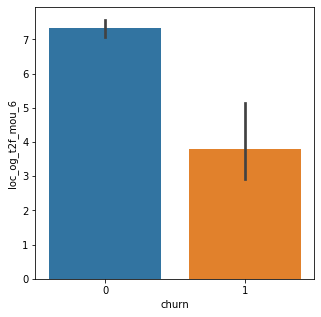

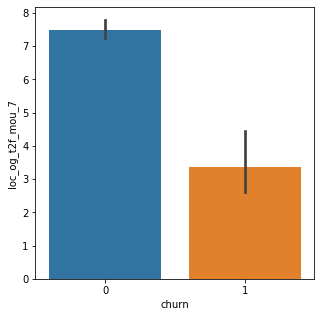

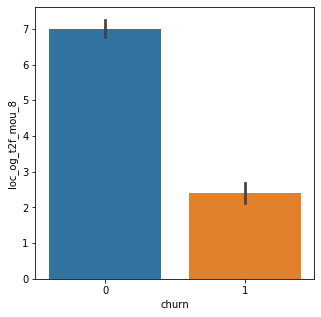

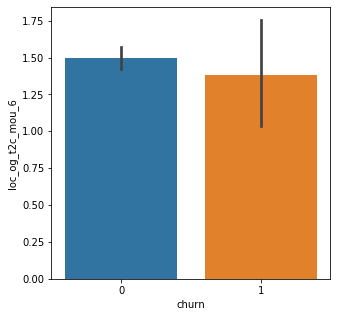

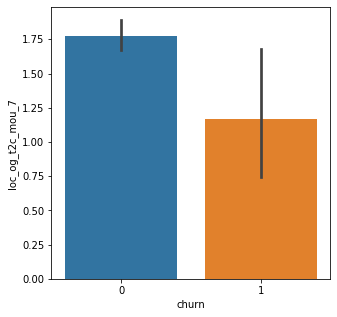

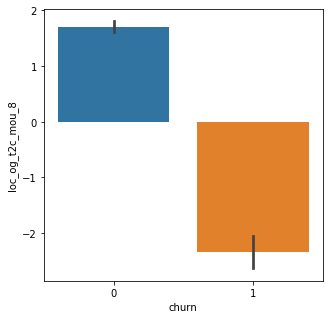

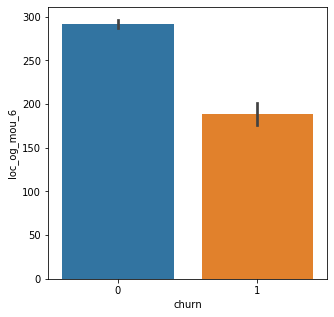

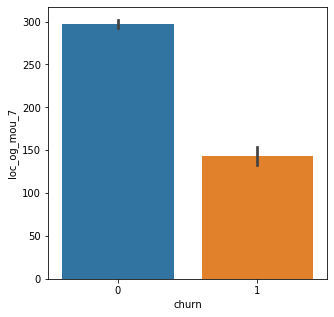

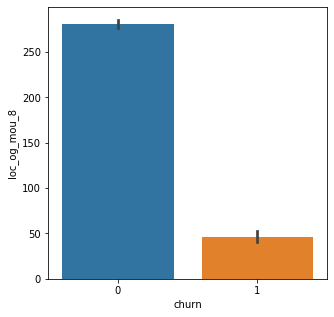

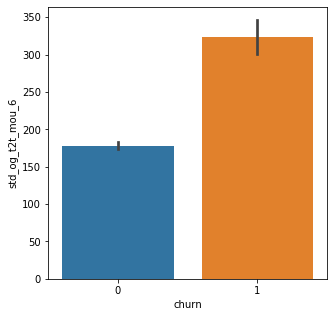

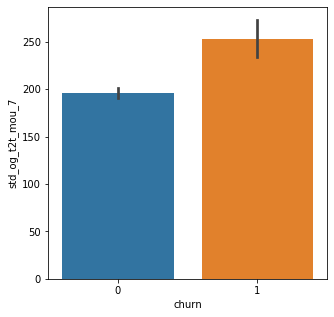

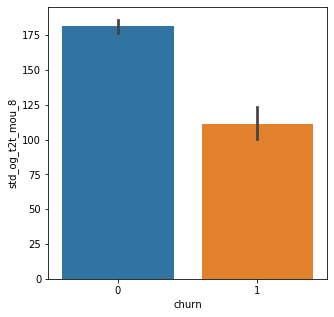

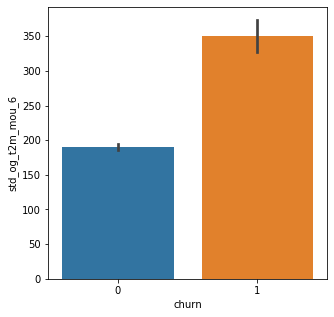

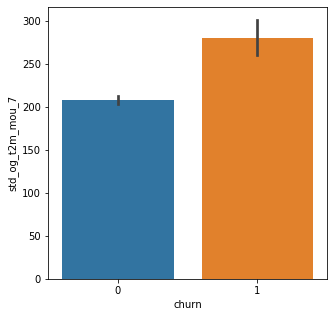

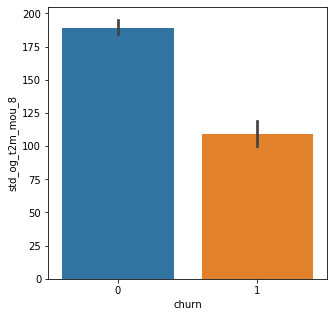

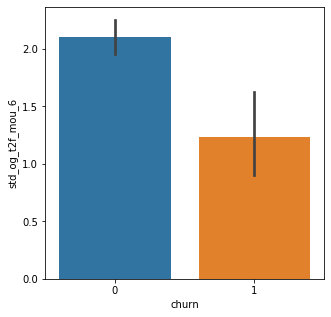

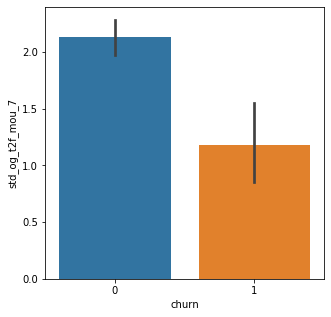

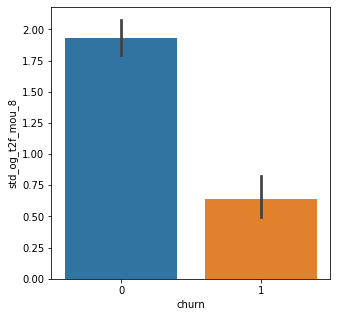

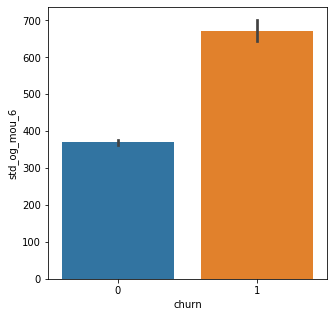

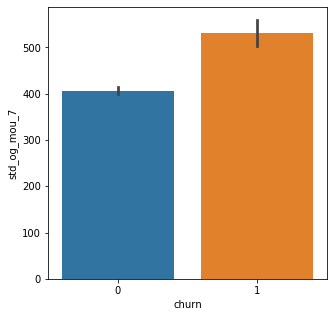

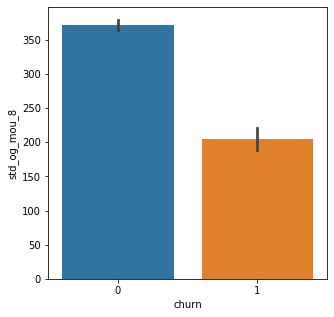

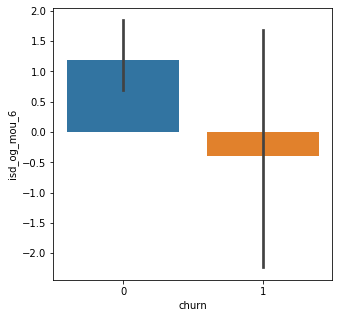

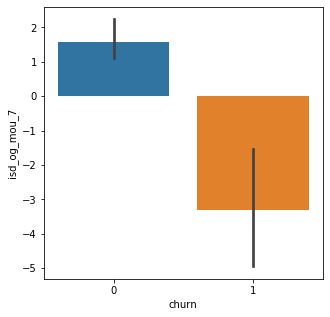

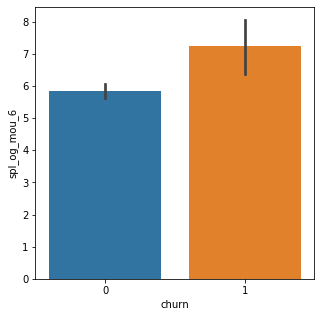

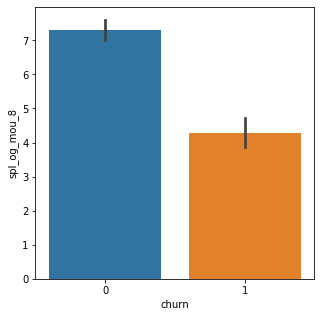

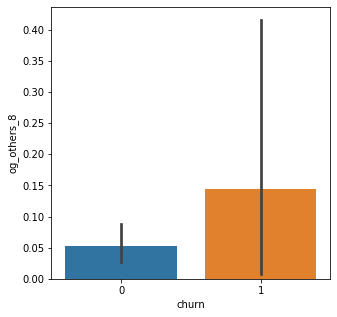

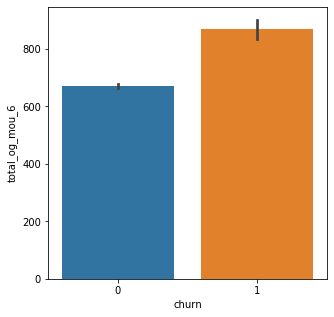

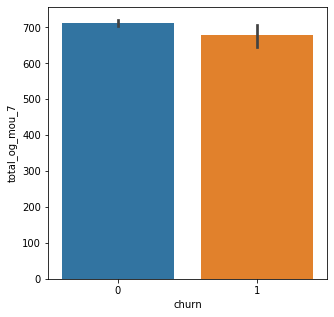

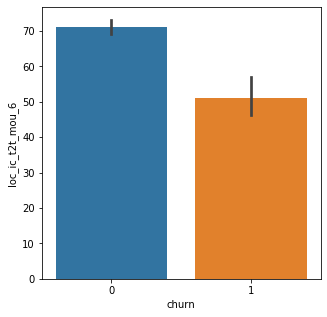

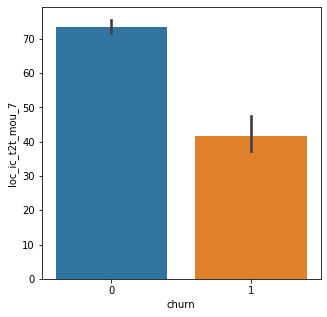

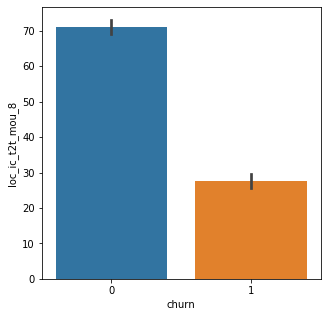

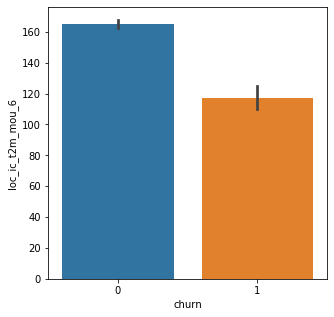

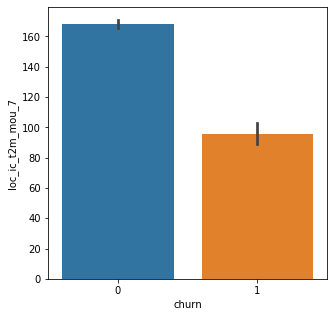

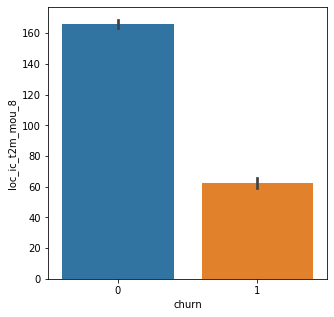

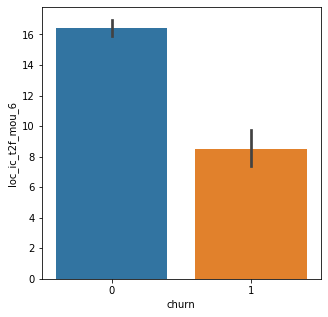

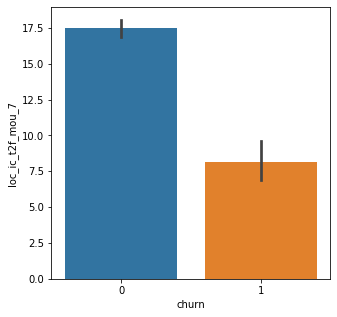

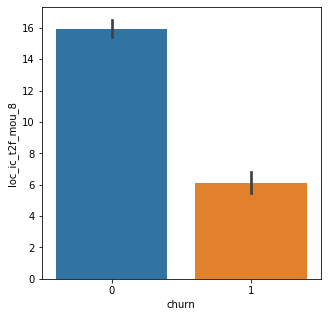

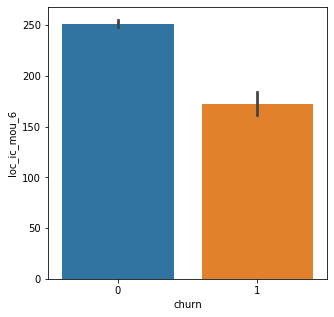

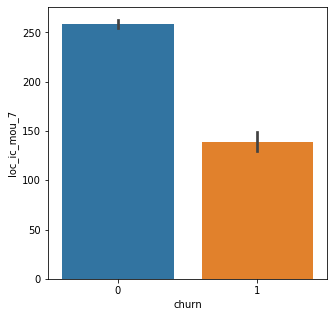

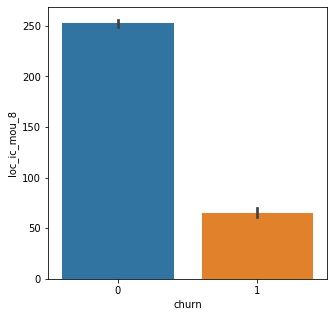

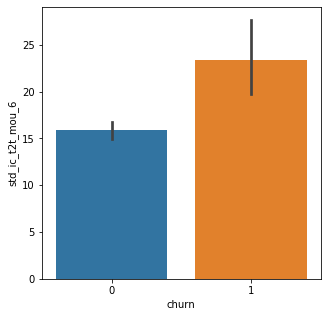

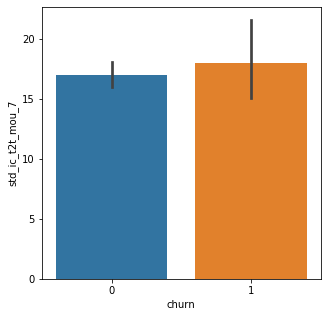

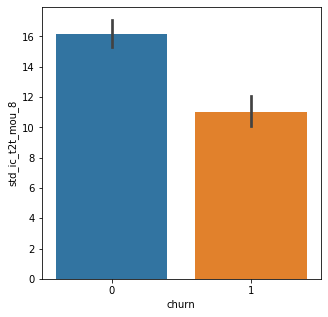

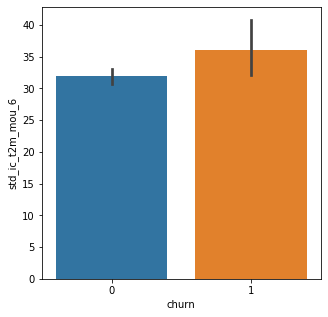

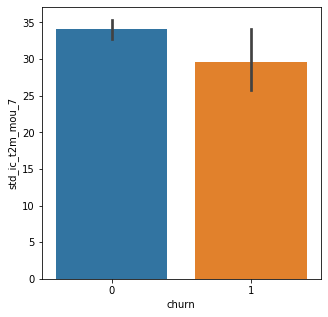

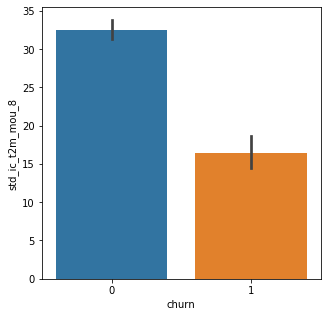

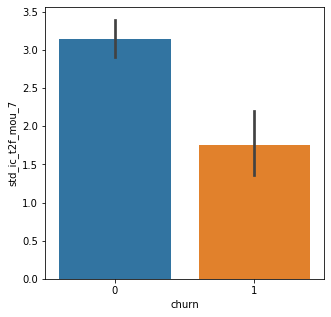

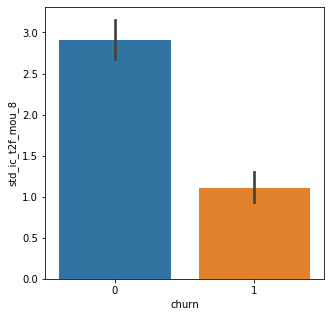

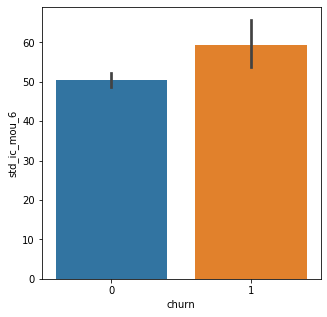

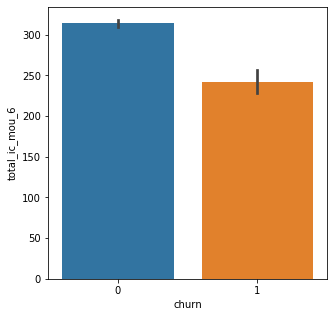

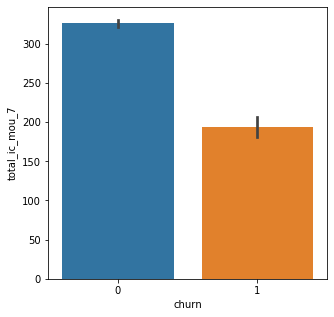

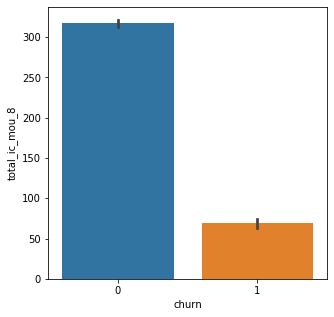

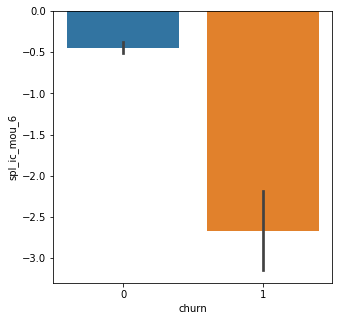

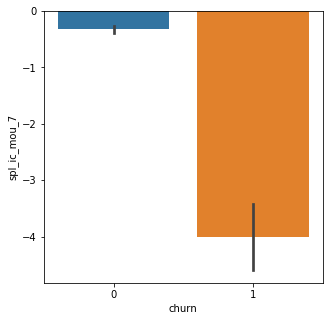

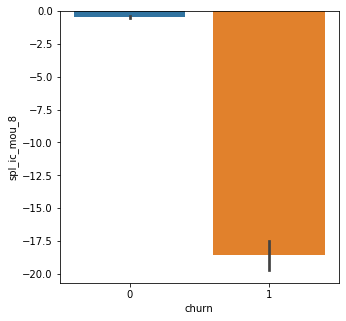

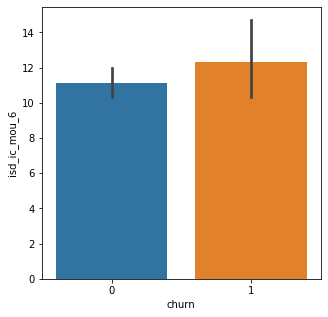

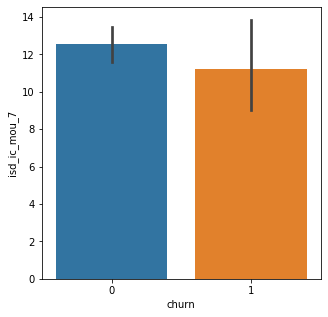

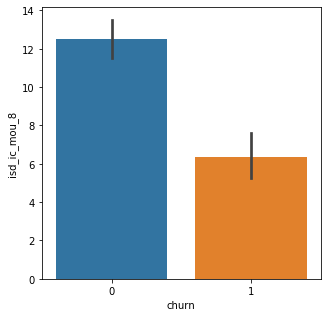

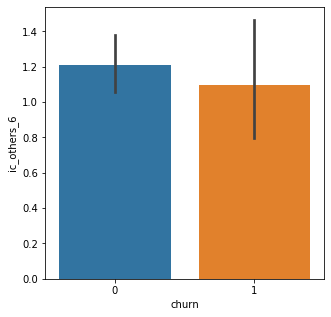

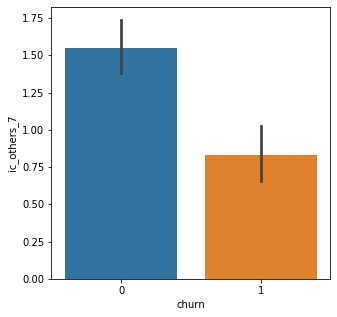

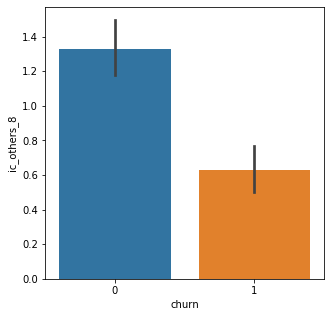

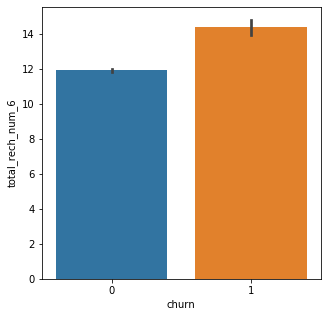

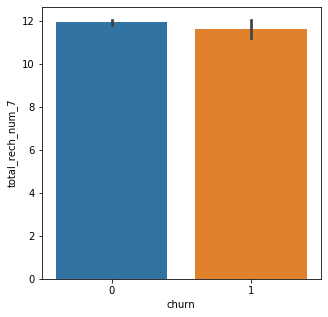

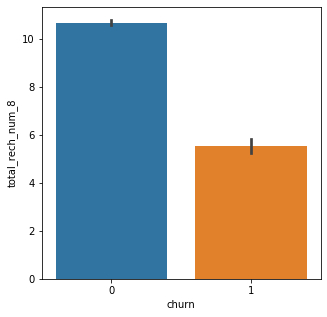

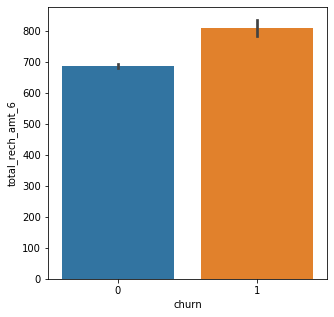

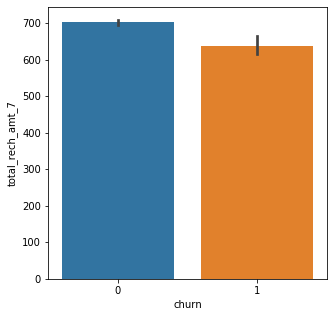

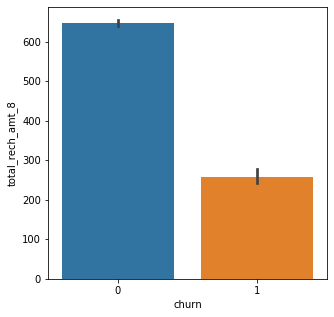

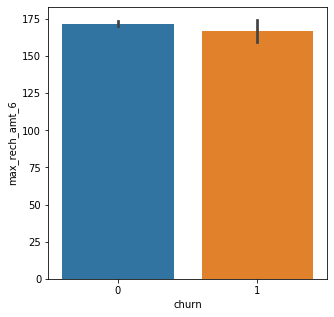

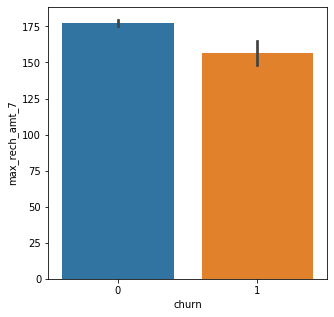

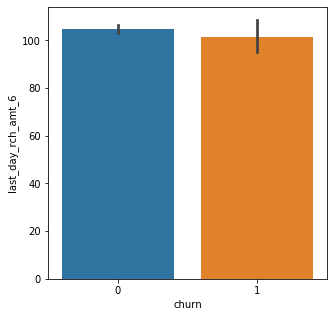

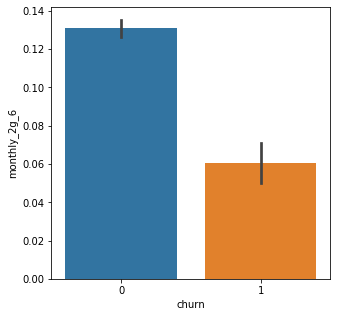

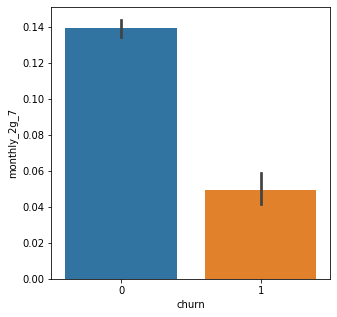

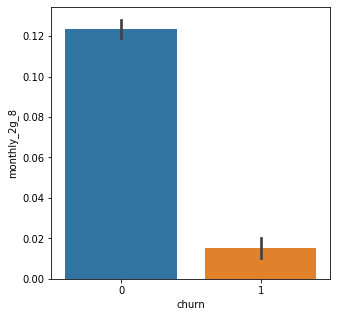

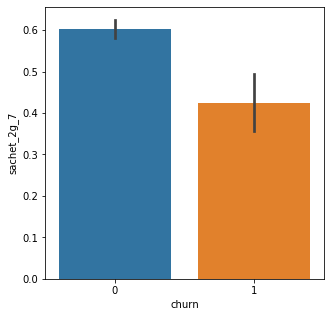

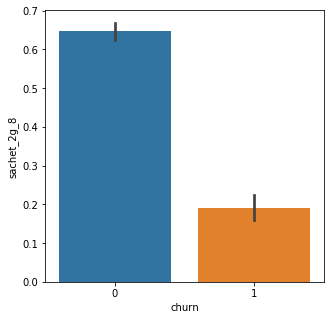

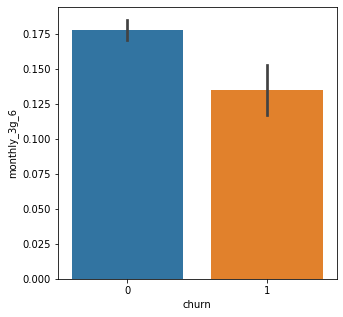

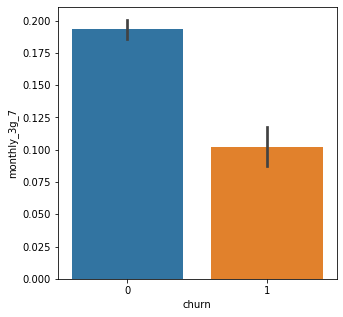

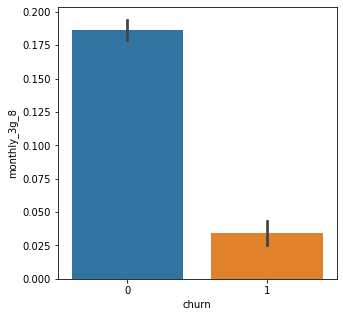

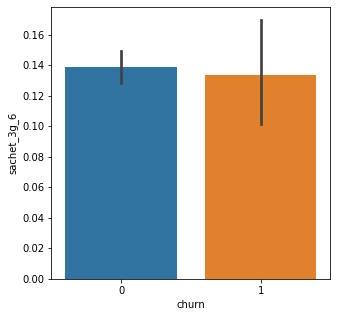

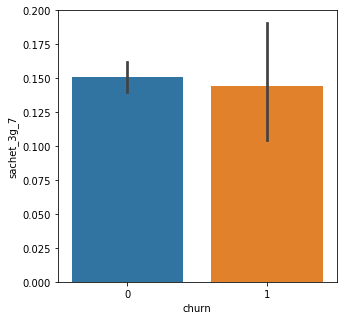

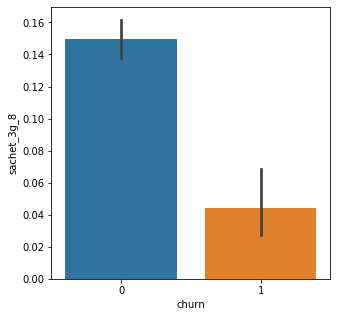

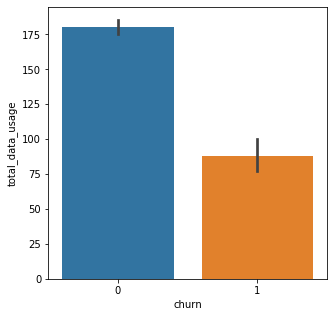

In [34]:
#plotting the bar plot
cont_cols = [col for col in tele_c.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize = (5, 5))
    sns.barplot(x = 'churn', y = col, data = tele_c)
    plt.show()


In [35]:
tele_c.shape

(29979, 122)

## Step 6: Outlier Analysis 

In [36]:
tele_c.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])
#As we can see we have outlier.

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    587.587624    589.424681    535.067748    295.766307   
std     6.846594e+05    442.848876    463.049067    492.447887    461.266344   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000    -66.791422   
1%      7.000028e+09     18.221200     25.600600      0.000000    -40.392019   
10%     7.000269e+09    270.692200    274.458200    134.118600     10.310000   
25%     7.000641e+09    364.352500    365.235000    289.782000     41.180000   
50%     7.001232e+09    495.951000    493.781000    452.232000    125.890000   
75%     7.001814e+09    704.184500    700.986000    671.349500    353.500000   
90%     7.002167e+09    994.311800    996.051400    985.499200    795.354000   
95%     7.002287e+09   1240.976700   1261.848400   1258.703300   1154.900000   
99%     7.002387e+09   1983.590100   1999.509680   1988.082260   2166.876000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     304.428602    266.408901    420.094277    425.870159    380.599271   
std      482.076634    467.627360    469.410183    485.483231    474.332191   
min     -318.469975   -506.809342      0.000000      0.000000      0.000000   
1%         0.000000    -44.507664      1.057800      1.099000      0.000000   
10%       10.090000      2.898000     58.606000     59.604000     35.072000   
25%       41.060000     27.070000    142.860000    141.280000    111.780000   
50%      125.560000     99.590000    282.260000    282.040000    241.040000   
75%      360.360000    298.215000    523.625000    532.905000    483.000000   
90%      825.486000    724.182000    916.490000    935.716000    854.006000   
95%     1208.691000   1115.857000   1271.757000   1287.221000   1188.523000   
99%     2220.577600   2189.445800   2328.192600   2411.004400   2212.303000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       17.793504      13.746132      14.519182      29.499511   
std        79.241726      76.386332      74.972230     118.601571   
min      -156.352254     -92.028478    -380.787833       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        35.046000      19.969140      33.960000      64.604000   
95%        94.883000      63.760000      64.445000     168.647000   
99%       349.546000     293.541000     289.290600     544.085400   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       22.112839      21.736397         95.172112         96.071660   
std        97.963875     106.253286        236.823659        248.156392   
min       -16.355024     -11.767931          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          1.190000          1.460000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         34.030000         33.190000   
75%         0.000000       0.000000         91.550000         91.535000   
90%        41.216000      37.150000        208.006000        2

In [37]:
#removing outliers
cont_cols = [col for col in tele_c.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    Q1 = tele_c[col].quantile(0.01)
    Q3 = tele_c[col].quantile(0.99)
    IQR = Q3 - Q1
    tele_c= tele_c[(tele_c[i] >= (Q1 - 1.5 * IQR)) & (tele_c[i] <= (Q3 + 1.5 * IQR))]

In [38]:
tele_c.shape

(27398, 122)

#### Model Building

#### Principal component analysis : to remove columns

In [39]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
#for implimenting pca
from sklearn.decomposition import PCA

#importing standard scalar for scaling
from sklearn.preprocessing import StandardScaler
#instantiating object
scaler = StandardScaler()

#### Train test split

In [40]:
# Putting feature variable to X
X = tele_c.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = tele_c['churn']
X[X.columns] = scaler.fit_transform(X)

In [41]:
#divinding the dataframe to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [42]:
#applying PCA with 90% and checking the shape
pca = PCA(0.9)
data_pca = pca.fit_transform(X_train)
data_pca.shape

(19178, 47)

After performing PCA we are left with 47 columns

In [43]:
#components of PCA
pca.components_

array([[ 0.14167649,  0.15654017,  0.16617481, ...,  0.03361284,
        -0.        ,  0.02710362],
       [ 0.1144102 ,  0.14608505,  0.13472025, ..., -0.0511163 ,
         0.        , -0.0511111 ],
       [ 0.16311738,  0.19810418,  0.18750073, ...,  0.15851887,
        -0.        ,  0.20140834],
       ...,
       [-0.12020692,  0.02541125,  0.08557945, ..., -0.44300519,
        -0.        ,  0.00387071],
       [ 0.00699957, -0.01142399,  0.04044766, ...,  0.06517393,
        -0.        , -0.00679027],
       [-0.0244272 , -0.0009537 ,  0.03872085, ..., -0.00844659,
         0.        , -0.00633869]])

In [44]:
#explained variance ratio
pca.explained_variance_ratio_

array([0.10256414, 0.08906736, 0.05782365, 0.05062467, 0.03918014,
       0.03648793, 0.03417041, 0.0289749 , 0.02805754, 0.02636642,
       0.02584754, 0.02333822, 0.02218565, 0.02160433, 0.02042603,
       0.0182006 , 0.01753384, 0.01680494, 0.01663672, 0.01584126,
       0.01409256, 0.01397533, 0.01369048, 0.01199422, 0.01129296,
       0.01007512, 0.00962255, 0.00879831, 0.00829092, 0.00810398,
       0.00768151, 0.00755817, 0.00710762, 0.00696681, 0.00683945,
       0.00670705, 0.00646665, 0.00614277, 0.00605745, 0.00571249,
       0.005231  , 0.00502366, 0.0047101 , 0.00438776, 0.00425634,
       0.00415391, 0.00410433])

Text(0, 0.5, 'Cumulative_variance')

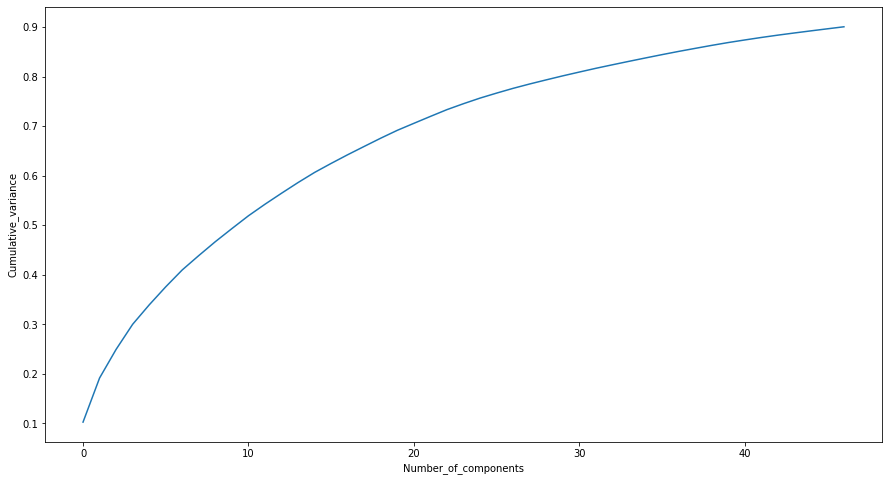

In [45]:
#plot depicting number_of_components v/s cumulative_variance
%matplotlib inline
fig = plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number_of_components')
plt.ylabel('Cumulative_variance')

 From above we can can conclude that 90% of data is explained by 45+ components thus 47 is good

In [46]:
#fit and transform the train data
df_train = pca.fit_transform(X_train)

In [47]:
df_train.shape

(19178, 47)

#### Model 1- Logistic Regression with PCA

In [48]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [49]:
#creating instance of logistic regression
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train,y_train)

In [50]:
#transforming the test data
df_test = pca.transform(X_test)

In [51]:
#predicting the model
pred_probs_test = model_pca.predict_proba(df_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [52]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test)
y_pred_default = model_pca.predict(df_test)

In [53]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test[:,1])
y_pred_df.head()

0
0  0.662745
1  0.018904
2  0.049458
3  0.524373
4  0.467501

In [54]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
10124      0
52732      0
47458      0
91826      0
69396      0

In [55]:
#reseting the index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [56]:
#building final model
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [57]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8907116490923122


### ROC Curve 

In [59]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

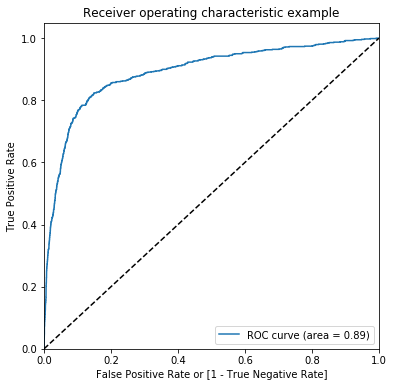

(array([0.        , 0.        , 0.        , ..., 0.99973126, 0.99986563,
        1.        ]),
 array([0.        , 0.00128535, 0.00257069, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99988767e+00, 9.99887673e-01, 9.99574848e-01, ...,
        1.33048251e-05, 7.23971325e-06, 1.76187954e-08]))

In [60]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.662745    1    1    1    1    1    1    1    0    0    0
1      0    0.018904    1    0    0    0    0    0    0    0    0    0
2      0    0.049458    1    0    0    0    0    0    0    0    0    0
3      0    0.524373    1    1    1    1    1    1    0    0    0    0
4      0    0.467501    1    1    1    1    1    0    0    0    0    0

In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.094647  0.000000  1.000000
0.1   0.1  0.334672  0.267939  0.973008
0.2   0.2  0.521533  0.477560  0.942159
0.3   0.3  0.659854  0.634776  0.899743
0.4   0.4  0.773966  0.764714  0.862468
0.5   0.5  0.845864  0.848159  0.823907
0.6   0.6  0.887470  0.900833  0.759640
0.7   0.7  0.911071  0.938995  0.643959
0.8   0.8  0.921046  0.963988  0.510283
0.9   0.9  0.924331  0.982263  0.370180


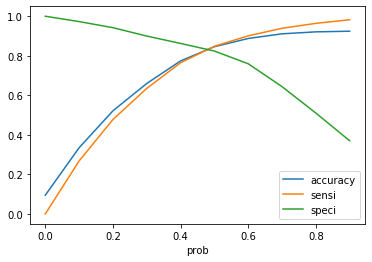

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [64]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.489 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.476 else 0)
y_pred_final.churn.value_counts()

0    7442
1     778
Name: churn, dtype: int64

### Confusion matrix 

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6203, 1239],
       [ 133,  645]], dtype=int64)

### Result of Logistic Regression model matrix with PCA 

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8458637469586374
Sensitivity:  0.8290488431876607
Specificity:  0.8335124966406879
false postive rate:  0.166487503359312
positive predictive value:  0.34235668789808915
Negative predictive value:  0.9790088383838383
Misclassification Rate:  0.16690997566909976


### Model 2-Logistic Regression with RFE 

As pca has already selected 47 features now we will select around 15 features with RFE

### Applying R.F.E. 

In [67]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
#creating instance
logreg = LogisticRegression()

#importing for RFE
from sklearn.feature_selection import RFE
#selecting no of features = 15
rfe = RFE(logreg, 15)      
#fitting the data
rfe = rfe.fit(X_train, y_train)

In [68]:
#retreiving columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8'],
      dtype='object')

In [69]:
#importing statsmodel for model building
import statsmodels.api as sm
#building the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#adding constant
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#getting the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19178
Model:                            GLM   Df Residuals:                    19162
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3849.6
Date:                Sun, 29 Nov 2020   Deviance:                       7699.1
Time:                        17:49:00   Pearson chi2:                 3.10e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6778      0.065    -56.199      0.000      -3.806      -3.549
arpu_7                 0.5769      0.046     12.498      0.000       0.486       0.667
offnet_mou_8          -0.9307      0.163     -5.705      0.000      -1.250      -0.611
roam_og_mou_8          0.3420      0.028     12.038      0.000       0.286       0.398
std_og_t2m_mou_8       0.6388      0.152      4.194      0.000       0.340       0.937
loc_ic_t2m_mou_7       0.3363      0.090      3.738      0.000       0.160       0.513
loc_ic_t2m_mou_8      -0.5246      0.270     -1.940      0.052      -1.054       0.005
loc_ic_mou_8          -0.8603      0.271     -3.174      0.002      -1.392      -0.329
total_ic_mou_7         0.3698      0.081      4.591      0.000       0.212       0.528
total_ic_mou_8        -0.8663      0.182     -4.769      0.000      -1.222      -0.510
spl_ic_mou_8          -0.5937      0.029    -20.755      0.000      -0.650      -0.538
total_rech_num_8      -0.4092      0.051     -8.041      0.000      -0.509      -0.309
total_rech_amt_8      -0.4601      0.056     -8.219      0.000      -0.570      -0.350
last_day_rch_amt_8    -0.5370      0.061     -8.824      0.000      -0.656      -0.418
monthly_2g_8          -0.4268      0.066     -6.452      0.000      -0.556      -0.297
monthly_3g_8          -0.6388      0.080     -7.942      0.000      -0.796      -0.481
======================================================================================
"""

## Check for vif 

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8       total_ic_mou_8  8.92
6         loc_ic_mou_8  7.33
5     loc_ic_t2m_mou_8  6.92
1         offnet_mou_8  6.03
7       total_ic_mou_7  5.67
3     std_og_t2m_mou_8  5.26
4     loc_ic_t2m_mou_7  5.22
11    total_rech_amt_8  3.66
0               arpu_7  2.43
10    total_rech_num_8  1.39
12  last_day_rch_amt_8  1.32
14        monthly_3g_8  1.10
9         spl_ic_mou_8  1.09
2        roam_og_mou_8  1.08
13        monthly_2g_8  1.03

#### We can note that the p value for every column is 0 and vif is also in defined range thus we do not need to drop any column

#### BUILDING LOGISTIC REG MODEL USING SKLEARN

In [71]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [73]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [74]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test[:,1])
y_pred_df.head()

0
0  0.655383
1  0.003606
2  0.050061
3  0.358254
4  0.507185

In [75]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
10124      0
52732      0
47458      0
91826      0
69396      0

In [76]:
#reseting the index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [77]:
#building final model
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [78]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})

## ROC AUC Curve 

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8936930600931695


In [80]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

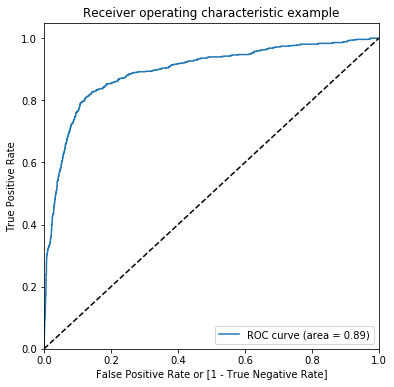

(array([0.00000000e+00, 0.00000000e+00, 1.34372481e-04, ...,
        9.99731255e-01, 9.99865628e-01, 1.00000000e+00]),
 array([0.        , 0.00128535, 0.00128535, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99999892e+00, 9.99998922e-01, 9.99994545e-01, ...,
        4.33276245e-08, 1.17580972e-08, 2.15066768e-10]))

In [81]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.655383    1    1    1    1    1    1    1    0    0    0
1      0    0.003606    1    0    0    0    0    0    0    0    0    0
2      0    0.050061    1    0    0    0    0    0    0    0    0    0
3      0    0.358254    1    1    1    1    0    0    0    0    0    0
4      0    0.507185    1    1    1    1    1    1    0    0    0    0

In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.094647  0.000000  1.000000
0.1   0.1  0.349878  0.284601  0.974293
0.2   0.2  0.491849  0.444639  0.943445
0.3   0.3  0.626399  0.595808  0.919023
0.4   0.4  0.742579  0.727224  0.889460
0.5   0.5  0.833820  0.833512  0.836761
0.6   0.6  0.889781  0.903386  0.759640
0.7   0.7  0.913017  0.943295  0.623393
0.8   0.8  0.921655  0.969632  0.462725
0.9   0.9  0.922749  0.984413  0.332905


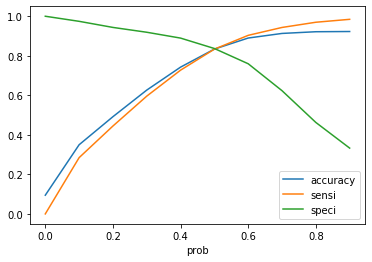

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [85]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.489 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.51 else 0)
y_pred_final.churn.value_counts()

0    7442
1     778
Name: churn, dtype: int64

### confusion matrix 

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6282, 1160],
       [ 131,  647]], dtype=int64)

## Result of Logistic regression model after removing column using p value and vif 

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8338199513381995
Sensitivity:  0.8316195372750642
Specificity:  0.8441279226014512
false postive rate:  0.15587207739854878
positive predictive value:  0.3580520199225235
Negative predictive value:  0.9795727428660533
Misclassification Rate:  0.1570559610705596


We are able to predict Churn customers with 84.4 percent accuracy using Logistic regression model with RFE

### Model 3- Decision tree classifier with PCA 

In [88]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
# Making predictions
y_pred_default = dt_default.predict(df_test)

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      7442
           1       0.27      0.80      0.41       778

    accuracy                           0.78      8220
   macro avg       0.62      0.79      0.63      8220
weighted avg       0.91      0.78      0.82      8220

[[5759 1683]
 [ 152  626]]
Acuracy Score 0.7767639902676399


## Result of Decision Tree Classifier

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7767639902676399
Sensitivity:  0.8316195372750642
Specificity:  0.8441279226014512
false postive rate:  0.15587207739854878
positive predictive value:  0.3580520199225235
Negative predictive value:  0.9795727428660533
Misclassification Rate:  0.1570559610705596


#### Model 3b-Decision tree classifier with Hyperparameter tuning 

In [91]:
#importing libraries 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 40)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(df_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [92]:
y_train.shape

(19178,)

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.223595      0.058974         0.000999        0.001999   
1       0.331727      0.002001         0.000000        0.000000   
2       0.479687      0.003811         0.000813        0.000996   
3       0.670813      0.092560         0.002426        0.002957   
4       0.851719      0.167954         0.002017        0.003120   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.792753           0.809958   
1               2  {'max_depth': 2}           0.708811           0.761992   
2               3  {'max_depth': 3}           0.833160           0.852972   
3               4  {'max_depth': 4}           0.778676           0.808133   
4               5  {'max_depth': 5}           0.824296           0.788321   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.804745           0.808083           0.782269         0.799562   
1           0.665798           0.722034           0.732986         0.718324   
2           0.772680           0.813299           0.804433         0.815309   
3           0.787539           0.821643           0.791656         0.797529   
4           0.803441           0.831812           0.786441         0.806862   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.010516               37            0.794290            0.810129   
1        0.031576               39            0.720310            0.761048   
2        0.027117               35            0.839069            0.860644   
3        0.015386               38            0.786469            0.811498   
4        0.018433               36            0.841155            0.798788   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.791813            0.809359            0.796715   
1            0.645353            0.727693            0.742684   
2            0.764112            0.824089            0.807469   
3            0.785295            0.827869            0.799192   
4            0.807522            0.842860            0.799127   

   mean_train_score  std_train_score  
0          0.800461         0.007740  
1          0.719418         0.039571  
2          0.819077         0.032584  
3          0.802065         0.016047  
4          0.817890         0.019946

 Plotting accuracies with max_depth

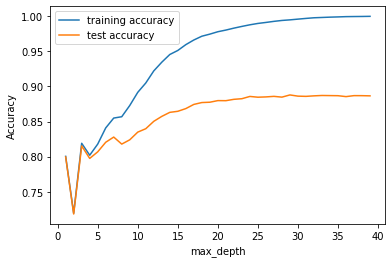

In [94]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

.Tuning min sample leaf 

In [95]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
tree.fit(df_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.691899      0.140043         0.003125        0.006250   
1       1.457023      0.121942         0.000000        0.000000   
2       1.407877      0.071195         0.003125        0.006250   
3       1.263619      0.085922         0.006249        0.007653   
4       1.247634      0.143365         0.000000        0.000000   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.852450   
1                     25  {'min_samples_leaf': 25}           0.793274   
2                     45  {'min_samples_leaf': 45}           0.799009   
3                     65  {'min_samples_leaf': 65}           0.792753   
4                     85  {'min_samples_leaf': 85}           0.771637   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.845151           0.862357           0.855541           0.861538   
1           0.796924           0.797185           0.797914           0.797132   
2           0.792753           0.789103           0.774967           0.808605   
3           0.778154           0.784672           0.779400           0.796089   
4           0.764338           0.775026           0.775750           0.782269   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.855408        0.006322                1            0.943488   
1         0.796486        0.001640                2            0.850020   
2         0.792888        0.011135                3            0.823491   
3         0.786214        0.007128                7            0.821145   
4         0.773804        0.005852               10            0.799244   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.943358            0.942250            0.940233   
1            0.856733            0.843110            0.840579   
2            0.829879            0.818537            0.811054   
3            0.807848            0.807196            0.814639   
4            0.793247            0.792204            0.798214   

   split4_train_score  mean_train_score  std_train_score  
0            0.938930          0.941652         0.001792  
1            0.844815          0.847051         0.005744  
2            0.846575          0.825907         0.012031  
3            0.818484          0.813862         0.005579  
4            0.806557          0.797893         0.005117

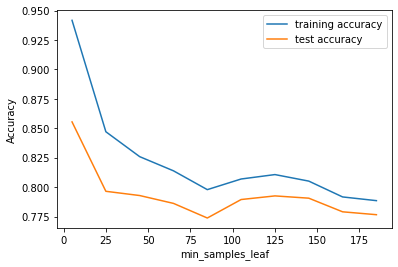

In [97]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning minimum sample split 

In [98]:
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
tree.fit(df_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.792460      0.152508         0.002420        0.003907   
1       1.844021      0.160127         0.006250        0.007655   
2       1.679680      0.075872         0.000000        0.000000   
3       1.908172      0.208475         0.003804        0.002646   
4       1.910508      0.216110         0.000400        0.000800   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.869917   
1                      25  {'min_samples_split': 25}           0.835245   
2                      45  {'min_samples_split': 45}           0.807612   
3                      65  {'min_samples_split': 65}           0.799270   
4                      85  {'min_samples_split': 85}           0.789885   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.875391           0.887643           0.883442           0.891786   
1           0.843848           0.854015           0.846154           0.845111   
2           0.818040           0.836548           0.819817           0.822425   
3           0.805527           0.832377           0.801565           0.802608   
4           0.790146           0.822471           0.793220           0.799218   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.881636        0.007984                1            0.993547   
1         0.844874        0.005984                2            0.935341   
2         0.820889        0.009307                3            0.893821   
3         0.808269        0.012221                4            0.871008   
4         0.798988        0.012213                5            0.853213   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.994786            0.994394            0.993091   
1            0.938274            0.940881            0.933325   
2            0.894212            0.908812            0.889722   
3            0.872768            0.886781            0.862087   
4            0.852953            0.867227            0.847096   

   split4_train_score  mean_train_score  std_train_score  
0            0.995633          0.994290         0.000900  
1            0.928762          0.935317         0.004163  
2            0.894480          0.896209         0.006536  
3            0.868214          0.872171         0.008155  
4            0.858176          0.855733         0.006734

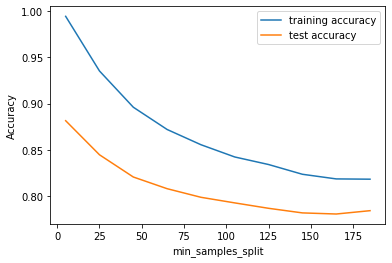

In [100]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

 Creating parameter grid 

In [101]:
# Create the parameter grid 
param_grid = {'max_depth': range(5, 15, 5),'min_samples_leaf': range(5, 200, 20),'min_samples_split': range(5, 200, 20),'criterion': ["entropy", "gini"]}
n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',cv = n_folds, verbose = 1, n_jobs = -1,return_train_score = True)

# Fit the grid search to the data
grid_search.fit(df_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 20.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'cr

In [102]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.514858      0.039595         0.004626        0.003795   
1       2.335129      0.134152         0.003799        0.000399   
2       2.241085      0.080061         0.005426        0.004012   
3       2.427026      0.060315         0.004031        0.004937   
4       2.336820      0.190803         0.003619        0.004479   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                      5   
1         entropy               5                      5   
2         entropy               5                      5   
3         entropy               5                      5   
4         entropy               5                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      25  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      45  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      65  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      85  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.820907           0.777372           0.819082           0.816949   
1           0.820907           0.777372           0.819082           0.816949   
2           0.821168           0.777633           0.819082           0.816949   
3           0.820907           0.777112           0.818300           0.816949   
4           0.820647           0.776330           0.818300           0.816688   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.803911         0.807644        0.016270               12   
1           0.803911         0.807644        0.016270               12   
2           0.803911         0.807749        0.016216               10   
3           0.803651         0.807384        0.016272               24   
4           0.803651         0.807123        0.016490               25   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.834311            0.785491            0.816777   
1            0.834311            0.785491            0.816777   
2            0.834311            0.785491            0.816777   
3            0.834311            0.784839            0.816060   
4            0.833855            0.783796            0.816060   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.823177            0.817246          0.815400         0.016236  
1            0.823177            0.817246          0.815400         0.016236  
2            0.823177            0.817246          0.815400         0.016236  
3            0.823177            0.816659          0.815009         0.016452  
4            0.822264            0.816659          0.814527         0.016642

 printing the optimal accuracy score and hyperparameters

In [103]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


best accuracy 0.8285011005325245
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [104]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [105]:
y_pred_default = clf_gini.predict(df_test)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6329, 1113],
       [ 248,  530]], dtype=int64)

## Result of Decision Tree classifier with hyperparameter tuning 

In [106]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8344282238442823
Sensitivity:  0.6812339331619537
Specificity:  0.8504434291857028
false postive rate:  0.14955657081429724
positive predictive value:  0.3225806451612903
Negative predictive value:  0.9622928386802494
Misclassification Rate:  0.16557177615571775


### Model 4- Random Forest Classifier with pca 

In [107]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit
rfc.fit(df_train,y_train)
# Making predictions
y_pred_default = rfc.predict(df_test)

#creating confusion matrix

In [108]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7383,   59],
       [ 563,  215]], dtype=int64)

## Result of random forest with pca

In [109]:
# TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ',TN / float(TN+FP))
print('false postive rate: ',FP/ float(TN+FP))
print('positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.2763496143958869
Specificity:  0.9907639323731997
false postive rate:  0.009236067626800251
positive predictive value:  0.7846715328467153
Negative predictive value:  0.9183110853163088
Misclassification Rate:  0.08679877197878873


#### Model 4b-Hyperparameter tuning for random forest 

In [110]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf_with_pca.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [111]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.387938      0.179256         0.108958        0.025610   
1      15.620961      0.351780         0.120732        0.004259   
2      22.772770      0.624517         0.163933        0.013331   
3      27.434356      1.526305         0.179767        0.053165   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.858446           0.869395   
1               7   {'max_depth': 7}           0.883472           0.886340   
2              12  {'max_depth': 12}           0.916840           0.915537   
3              17  {'max_depth': 17}           0.924140           0.919447   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.854015           0.858931           0.846415         0.857440   
1           0.889990           0.885007           0.886571         0.886276   
2           0.916319           0.921512           0.916558         0.917353   
3           0.923097           0.924641           0.924120         0.923089   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007476                4            0.858689            0.866119   
1        0.002161                3            0.908291            0.906205   
2        0.002124                2            0.968844            0.971255   
3        0.001889                1            0.994460            0.994069   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.850737            0.860327            0.853875   
1            0.904641            0.902301            0.908101   
2            0.968583            0.968846            0.969497   
3            0.991396            0.993482            0.992700   

   mean_train_score  std_train_score  
0          0.857949         0.005321  
1          0.905908         0.002245  
2          0.969405         0.000973  
3          0.993221         0.001088

Plotting accuracies with max_depth

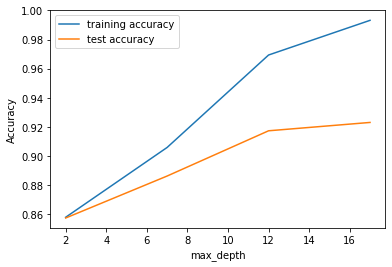

In [112]:
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [113]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.331504      0.492183         0.190811        0.015526   
1     101.617129      2.241104         0.766714        0.090787   
2     174.908741      1.014545         1.346699        0.127473   
3     225.953303     26.184896         1.701970        0.258896   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.904849   
1                500   {'n_estimators': 500}           0.906674   
2                900   {'n_estimators': 900}           0.908759   
3               1300  {'n_estimators': 1300}           0.905109   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.906413           0.904588           0.912647           0.910039   
1           0.909541           0.911887           0.913429           0.912125   
2           0.910063           0.911627           0.913429           0.908735   
3           0.909541           0.910845           0.912125           0.910039   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.907707        0.003144                4            0.947660   
1         0.910731        0.002385                1            0.948442   
2         0.910523        0.001799                2            0.948964   
3         0.909532        0.002378                3            0.949941   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.948703            0.948051            0.946230   
1            0.951115            0.949224            0.947729   
2            0.950789            0.948964            0.946816   
3            0.950984            0.949550            0.946946   

   split4_train_score  mean_train_score  std_train_score  
0            0.949945          0.948118         0.001221  
1            0.950336          0.949369         0.001229  
2            0.949358          0.948978         0.001273  
3            0.948706          0.949226         0.001355

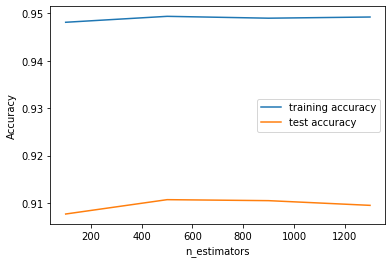

In [115]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_n_estimators"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

GridSearchCV to find optimal max_features

In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.721707      0.508892         0.176378        0.022219   
1      26.496485      0.502485         0.142335        0.003639   
2      43.251201      0.183120         0.145612        0.013208   
3      60.448775      1.326590         0.174612        0.028390   
4      69.765627      6.451670         0.130727        0.039074   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.904067   
1                  8   {'max_features': 8}           0.905892   
2                 14  {'max_features': 14}           0.906152   
3                 20  {'max_features': 20}           0.905109   
4                 24  {'max_features': 24}           0.909281   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.909541           0.911366           0.911343           0.907692   
1           0.908238           0.909541           0.913168           0.907692   
2           0.905892           0.911105           0.908735           0.910039   
3           0.908498           0.912409           0.907171           0.909257   
4           0.907716           0.908759           0.908996           0.911343   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.908802        0.002729                3            0.947334   
1         0.908906        0.002432                2            0.946747   
2         0.908385        0.002072                5            0.952549   
3         0.908489        0.002413                4            0.953005   
4         0.909219        0.001186                1            0.953917   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.949876            0.948051            0.944339   
1            0.949485            0.948768            0.945838   
2            0.951832            0.950854            0.948120   
3            0.952679            0.952874            0.949488   
4            0.953852            0.953852            0.950727   

   split4_train_score  mean_train_score  std_train_score  
0            0.946946          0.947309         0.001794  
1            0.947598          0.947687         0.001320  
2            0.949814          0.950634         0.001558  
3            0.951509          0.951911         0.001323  
4            0.952486          0.952967         0.001243

In [118]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

GridSearchCV to find optimal min_samples_leaf

In [119]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.235449      0.246731         0.183696        0.032436   
1      18.468857      0.422149         0.190492        0.020586   
2      17.744470      0.315141         0.190691        0.033010   
3      16.477994      0.297386         0.182896        0.025915   
4      15.394013      0.069376         0.157310        0.011716   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.857143   
1                    150  {'min_samples_leaf': 150}           0.843587   
2                    200  {'min_samples_leaf': 200}           0.837070   
3                    250  {'min_samples_leaf': 250}           0.830292   
4                    300  {'min_samples_leaf': 300}           0.820386   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.861053           0.862096           0.855802           0.850065   
1           0.851147           0.857404           0.844850           0.834941   
2           0.851929           0.845412           0.837810           0.829987   
3           0.834984           0.839677           0.833898           0.818253   
4           0.836288           0.834202           0.834159           0.816167   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.857232        0.004282                1            0.869313   
1         0.846386        0.007553                2            0.852627   
2         0.840441        0.007540                3            0.845457   
3         0.831421        0.007234                4            0.838548   
4         0.828240        0.008280                5            0.831443   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.869248            0.869443            0.867888   
1            0.854321            0.859145            0.856026   
2            0.850020            0.848716            0.841296   
3            0.840503            0.840242            0.840709   
4            0.836201            0.838222            0.839145   

   split4_train_score  mean_train_score  std_train_score  
0            0.864042          0.867987         0.002051  
1            0.854526          0.855329         0.002191  
2            0.845597          0.846217         0.003029  
3            0.835039          0.839008         0.002127  
4            0.830542          0.835111         0.003506

In [121]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

GridSearchCV to find optimal min_samples_split

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.511861      3.440615         0.147720        0.039720   
1      15.466965      2.456276         0.110542        0.013653   
2      14.806219      2.922087         0.105719        0.019392   
3      10.769764      0.141711         0.089750        0.001326   
4      10.629618      0.232694         0.086045        0.001918   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.870699   
1                     250  {'min_samples_split': 250}           0.860532   
2                     300  {'min_samples_split': 300}           0.860010   
3                     350  {'min_samples_split': 350}           0.851147   
4                     400  {'min_samples_split': 400}           0.845412   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.880083           0.876955           0.874316           0.867536   
1           0.875130           0.870177           0.861799           0.859452   
2           0.861575           0.865224           0.855280           0.850065   
3           0.858446           0.857925           0.854237           0.846936   
4           0.854015           0.858186           0.846936           0.837027   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.873918        0.004438                1            0.893495   
1         0.865418        0.006157                2            0.880394   
2         0.858431        0.005262                3            0.873419   
3         0.853738        0.004311                4            0.865924   
4         0.848315        0.007316                5            0.859014   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.893951            0.891474            0.890895   
1            0.884109            0.883588            0.879945   
2            0.871985            0.876809            0.870560   
3            0.865924            0.865663            0.865215   
4            0.861882            0.864946            0.857590   

   split4_train_score  mean_train_score  std_train_score  
0            0.890439          0.892051         0.001412  
1            0.880141          0.881635         0.001820  
2            0.870169          0.872588         0.002401  
3            0.865346          0.865614         0.000292  
4            0.856482          0.859983         0.003071

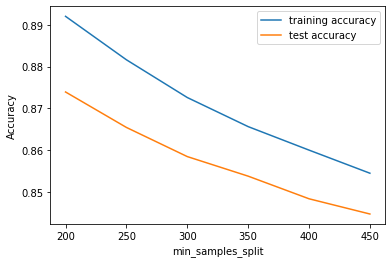

In [124]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### creating parameter grid

In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [8,10],'min_samples_leaf': range(100, 200, 100),'min_samples_split': range(200, 400, 100),'n_estimators': range(200, 400, 100),'max_features': [8, 10, 12]}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score',cv = 5, n_jobs=-1, verbose = 1,return_train_score = True)

In [126]:
# Fit the grid search to the data
grid_search.fit(df_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 35.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...,
                                              oob_score=False,
                                              r

In [127]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8580137121322325 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


### Building model with best parameters 

In [128]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',max_depth=10,min_samples_leaf=100,min_samples_split=200,max_features=8,n_estimators=300)

In [129]:
# fit
rfc.fit(df_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
# predict
y_pred_default = rfc.predict(df_test)

In [131]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7442
           1       0.38      0.77      0.51       778

    accuracy                           0.86      8220
   macro avg       0.68      0.82      0.71      8220
weighted avg       0.92      0.86      0.88      8220

[[6460  982]
 [ 181  597]]
accuracy_score:   0.8585158150851582


In [132]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6460,  982],
       [ 181,  597]], dtype=int64)

 ## Result of hyperparameter tuning for random forest

In [133]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives
print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ',TN / float(TN+FP))
print('false postive rate: ',FP/ float(TN+FP))
print('positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8585158150851582
Sensitivity:  0.7673521850899743
Specificity:  0.8680462241332975
false postive rate:  0.1319537758667025
positive predictive value:  0.37808739708676375
Negative predictive value:  0.9727450685137781
Misclassification Rate:  0.14148418491484185


# FINAL RESULTS OF ALL MODELS

#### A.Logistic Regression Model With RFE(w/o PCA)

Accuracy Score on test data:  0.833
Sensitivity:  0.831
Specificity:  0.844


#### B.Logistic Regression Model (with PCA)
Accuracy Score on test data:  0.845
Sensitivity:  0.829
Specificity:  0.833

#### C.Decison Tree Model (with PCA)
Accuracy Score: 0.834
Sensitivity:  0.681
Specificity:  0.85

#### D.Random Forest Model (with PCA)
Accuracy Score:   0.858
Sensitivity:  0.767
Specificity:  0.868


Important Variables for prediction for Customer Churn 

1. arpu_7
2. offnet_mou_8
3. roam_og_mou_8
4. total_og_mou_8
5. loc_ic_mou_7
6. loc_ic_mou_8 
7. total_rech_amt_8
8. last_day_rch_amt_8
9. monthly_2g_8
10. monthly_3g_8
11. aon

## Recommend Strategies To Manage Customer Churn 

- arpu_7 : ratio of people not being churned is slightly more than those being churned.Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- offnet_mou_8 : ratio of people not being churned is much more than those being churned

- roam_og_mou_8 : ratio of people being churned is more.The probability of people having roaming outgoing calls is more for being churn thus focusing on them will help.

- total_og_mou_8 :ratio of people not being churned is much more than those being churned.It is for the total outgoing calls thus offers for outgoing calls would help.

- loc_ic_mou_7 :ratio of people not being churned is much more than those being churned .Thus Lower the local incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

- loc_ic_mou_8 : ratio of people not being churned is much more than those being churned.Thus Lower the local incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

- total_rech_amt_8 :  ratio of people not being churned is much more than those being churned.Thus checking the total recharge amount and offering offers could help.

- last_day_rch_amt_8 : ratio of people not being churned is much more than those being churned.Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- monthly_2g_8 : according Service schemes with validity equivalent to a month for 2 G networks for month 8 we can see that people being churned is relatively very low compared to those not being churned

- monthly_3g_8 : according Service schemes with validity equivalent to a month for 3 G networks for month 8 we can see that people being churned is relatively very low compared to those not being churned

- aon : according to age on customer we can conclude that there are more people that are not churned thus can be an important factor